# Final Project Submission

Please fill out:
* Student name: Western Onzere
* Student pace: full time Hybrid
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:

# Business understanding 
- SyriaTel, like all telecom companies, faces customer churn, where customers stop using their services. Churn is a major financial risk because:

**✅ Acquiring new customers is expensive, often costing more than retaining existing ones.**

**✅ Lost customers mean lost recurring revenue, which directly impacts profitability.**

**✅ Competitive pressure is high, and dissatisfied customers can easily switch to competitors.**

- By analyzing patterns in customer behavior, SyriaTel can predict which customers are at risk of churning and take proactive actions (like offering discounts, personalized offers, or improving service).

# Business Objective
- The goal is to identify customers who are likely to churn early so the company can intervene before they leave. SyriaTel wants to:

✅ To predict churn risk and prioritize early intervention as it is cheaper to retain an existing customer than to acquire a new one.

✅ To reduce revenue loss by retaining high-risk customers through discounts or incentives.

✅ Ensure minimal false negatives, meaning as few churners as possible go undetected.

👉 **Key Trade-off:** SyriaTel is more concerned about false negatives (missing actual churners) than false positives (wrongly classifying loyal customers as churners). Offering discounts to a few loyal customers by mistake is less costly than losing actual churners.

# Key Metrics to Focus On
- Since the business goal is to catch as many churners as possible, our main evaluation metric is recall for Class 1 (churners).

✅ Primary Metric: Recall (for class 1 - Churners)
- **Why?** Recall ensures we identify most of the customers at risk of churning so the company can take preventive action.
- **Goal:** A high recall score ensures that very few churners are missed.
- **How?** By adjusting the probability threshold, we can increase recall (even if it means slightly more false positives).

**Formula:**
                             $$\text{Recall} = \frac{TP}{TP + FN}$$

👉 **TP (True Positives)** = Correctly predicted churners.

👉 **FN (False Negatives)** = Actual churners that we failed to identify (worst-case scenario).


# Data Understanding- Dataset Summary
- Total Records: 3,333 customers
- Target Variable: Churn (Binary: 1 = Churn, 0 = No Churn)
- Key Features:

1. Customer Information: 
    - state, account length, area code, phone number
2. Service Plans: 
    - international plan, voice mail plan, number vmail messages
3. Usage Metrics:
    - Daytime: total day minutes, total day calls, total day charge
    - Evening: total eve minutes, total eve calls, total eve charge
    - Nighttime: total night minutes, total night calls, total night charge
    - International: total intl minutes, total intl calls, total intl charge
4. Customer Interaction: 
    - customer service calls

# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

pd.set_option("display.max_columns", 75)


# Import dataset 

In [2]:
df = pd.read_csv("bigml.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Cleaning 

## Check for missing values 

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observation
- There are no missing values 

## Check for duplicates 

In [6]:
df.duplicated().sum()

0

#### Observations 
- There are no duplicate values 

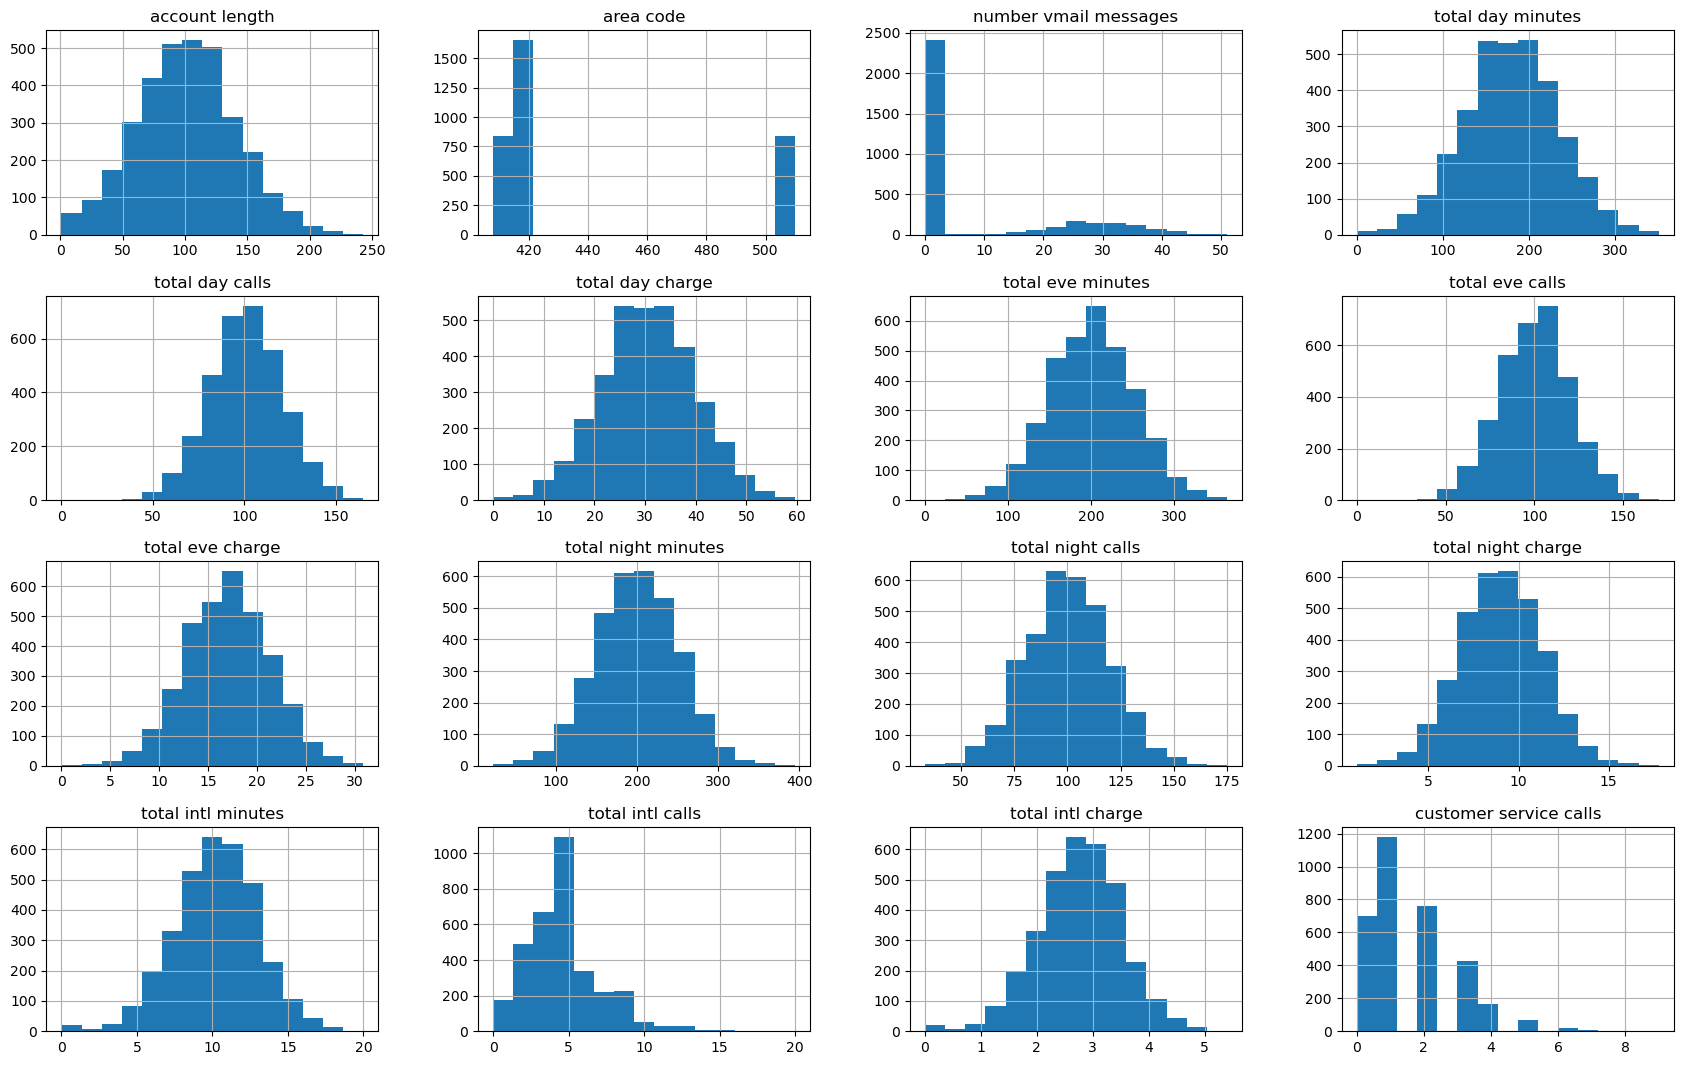

In [7]:
df.hist(bins=15, figsize=(21,13));

### Observation 
- Most of the columns folow a normal distribution 
- Columns such as `number vmail messages`, `total intl calls`, and `customer service call` do not assume normal distribution

## Target column class distribution 


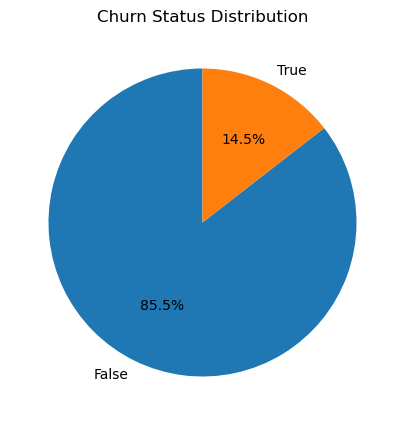

In [8]:
# Count target class distribution
target_class = df['churn'].value_counts().reset_index()
target_class.columns = ['churn', 'count']  

# Plot pie chart
plt.figure(figsize=(5, 5))  # Set figure size
plt.pie(
    target_class['count'], 
    labels=target_class['churn'], 
    autopct='%1.1f%%', 
    startangle=90, 
    
)

# Title
plt.title('Churn Status Distribution')

# Show the plot
plt.show()


### Observations
- There is definitely a case of class imbalance in our dataset
- The overal churn rate is 14.5%

# Feature engineering 

## Total Minutes, calls and charges

In [9]:
# Total minutes 
df["total_minutes"] = df["total day minutes"] + df["total eve minutes"] + df["total night minutes"] 

# Total calls 
df["total_calls"] = df["total day calls"] + df["total eve calls"] + df["total night calls"] 

# Total Charges
df["total_charge"] = df["total day charge"] + df["total eve charge"] + df["total night charge"]


df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36


## Call-to-Minutes Ratio
- Identifies users who make many short calls vs. fewer long calls.

In [10]:
#df["calls_per_minute"] = df["total_calls"] / (df["total_minutes"] + 1)
df["calls_per_minute"] = np.where(df["total_minutes"] == 0, 0, df["total_calls"] / (df["total_minutes"] + 1))


## Average Call Duration
- Measures how long customers typically talk.


In [11]:
df["avg_call_duration"] = np.where(df["total_minutes"] ==0, 0, df["total_minutes"] / (df["total_calls"] + 1))  # Avoid division by zero

## Activity Index
- Sum of total minutes and total calls to represent overall customer activity.

In [12]:
# Compute total activity score (combining calls & minutes)
df["activity_score"] = df["total_minutes"] + df["total_calls"]

# Define percentiles
low_threshold = df["activity_score"].quantile(0.25)   # 25th percentile
high_threshold = df["activity_score"].quantile(0.75)  # 75th percentile

# Assign activity index
df["activity_index"] = 1  # medium activity
df.loc[df["activity_score"] <= low_threshold, "activity_index"] = 0  # Low activity
df.loc[df["activity_score"] >= high_threshold, "activity_index"] = 2  # High activity


In [13]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,avg_call_duration,activity_score,activity_index
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86,0.423609,2.349502,1007.2,2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54,0.537143,1.853030,940.5,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00,0.620977,1.602432,855.2,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02,0.443491,2.241767,806.2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36,0.707894,1.405882,857.9,1


## International Call Intensity
- Helps identify frequent international callers who might be sensitive to price changes.
- International ratios may reveal price-sensitive customers who are more likely to churn. This ratio highlights how dependent a user is on international calling compared to their standard usage.


In [14]:
# International call intensity features
df["intl_call_ratio"] = np.where(df["total_calls"] == 0, 0, df["total intl calls"] / (df["total_calls"] + 1))
df["intl_minutes_ratio"] = np.where(df["total_minutes"] == 0, 0, df["total intl minutes"] / (df["total_minutes"] + 1))
df["intl_charge_ratio"] = np.where(df["total_charge"] == 0, 0, df["total intl charge"] / (df["total_charge"] + 1))
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,avg_call_duration,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,intl_charge_ratio
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86,0.423609,2.349502,1007.2,2,0.009967,0.014120,0.036556
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54,0.537143,1.853030,940.5,1,0.009091,0.022367,0.065440
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00,0.620977,1.602432,855.2,1,0.015198,0.023097,0.054833
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02,0.443491,2.241767,806.2,0,0.028112,0.011803,0.026962
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36,0.707894,1.405882,857.9,1,0.008403,0.020084,0.054210


## Customer Service Call Intensity
- Customers who call customer service a lot may be more likely to churn.


In [15]:
df["customer_service_call_ratio"] = np.where(df["total_calls"] == 0, 0, df["customer service calls"] / (df["total_calls"] + 1))
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,avg_call_duration,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,intl_charge_ratio,customer_service_call_ratio
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86,0.423609,2.349502,1007.2,2,0.009967,0.014120,0.036556,0.003322
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54,0.537143,1.853030,940.5,1,0.009091,0.022367,0.065440,0.003030
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00,0.620977,1.602432,855.2,1,0.015198,0.023097,0.054833,0.000000
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02,0.443491,2.241767,806.2,0,0.028112,0.011803,0.026962,0.008032
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36,0.707894,1.405882,857.9,1,0.008403,0.020084,0.054210,0.008403


## Voicemail Usage Indicator
- Customers with a voicemail plan who don’t use it might be more likely to churn.

In [16]:
df["vmail_usage_flag"] = (df["number vmail messages"] > 0).astype(int)
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,avg_call_duration,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,intl_charge_ratio,customer_service_call_ratio,vmail_usage_flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86,0.423609,2.349502,1007.2,2,0.009967,0.014120,0.036556,0.003322,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54,0.537143,1.853030,940.5,1,0.009091,0.022367,0.065440,0.003030,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00,0.620977,1.602432,855.2,1,0.015198,0.023097,0.054833,0.000000,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02,0.443491,2.241767,806.2,0,0.028112,0.011803,0.026962,0.008032,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36,0.707894,1.405882,857.9,1,0.008403,0.020084,0.054210,0.008403,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   phone number                 3333 non-null   object 
 4   international plan           3333 non-null   object 
 5   voice mail plan              3333 non-null   object 
 6   number vmail messages        3333 non-null   int64  
 7   total day minutes            3333 non-null   float64
 8   total day calls              3333 non-null   int64  
 9   total day charge             3333 non-null   float64
 10  total eve minutes            3333 non-null   float64
 11  total eve calls              3333 non-null   int64  
 12  total eve charge             3333 non-null   float64
 13  total night minute

In [18]:
## Drop columns 
df = df.drop(columns=["area code", 'phone number', 'total day minutes', "total day calls", 'total day charge',
                      'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                     'total night calls', 'total night charge' ], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   international plan           3333 non-null   object 
 3   voice mail plan              3333 non-null   object 
 4   number vmail messages        3333 non-null   int64  
 5   total intl minutes           3333 non-null   float64
 6   total intl calls             3333 non-null   int64  
 7   total intl charge            3333 non-null   float64
 8   customer service calls       3333 non-null   int64  
 9   churn                        3333 non-null   bool   
 10  total_minutes                3333 non-null   float64
 11  total_calls                  3333 non-null   int64  
 12  total_charge                 3333 non-null   float64
 13  calls_per_minute  

# Exploratory Data Analysis

## Churn By Customers with Voice mail plan

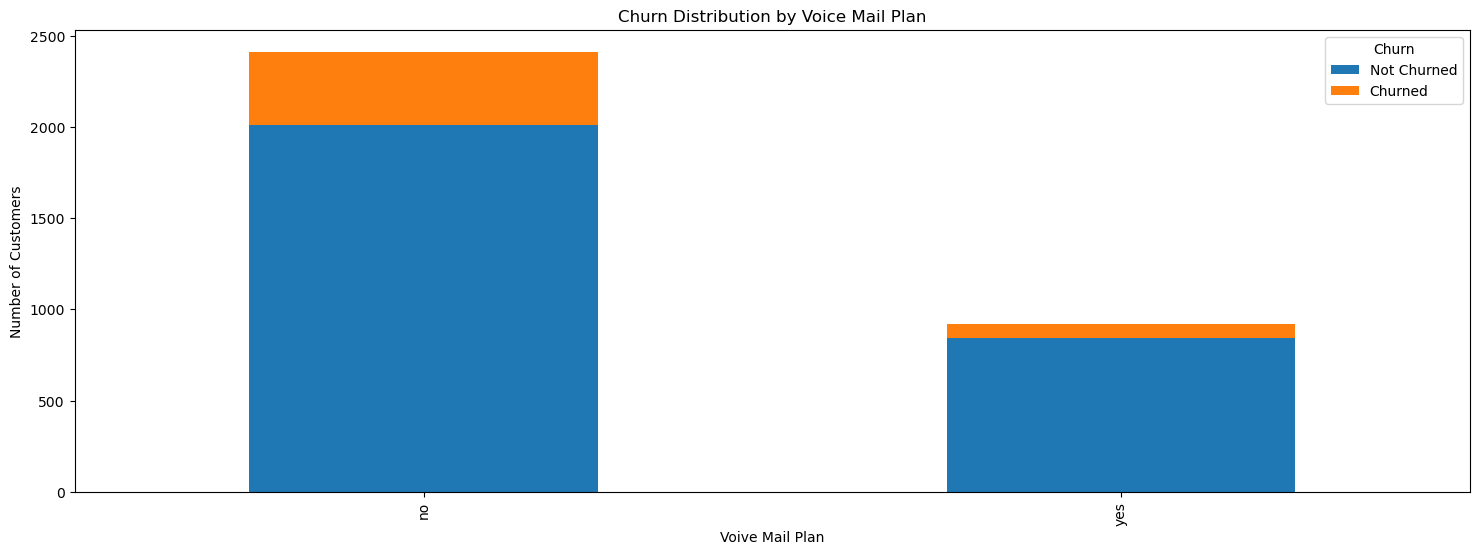

In [19]:
# Create stacked bar chart
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(
    kind='bar', stacked=True, figsize=(18,6)
)

# Add labels and title
plt.xlabel("Voive Mail Plan")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution by Voice Mail Plan")

# Show legend
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Display the plot
plt.show()



#### Observations 
- The vast majority of our customer base does not subscribe to the voice mail plan. While churn is present in both groups, the non-voice mail subscribers represent the larger portion of churned customers simply due to their greater number.
- It's evident from the distribution that voice mail plan usage is relatively low. Interestingly, non-voice mail customers are the largest churned group.



## Churn By Customers with International plan

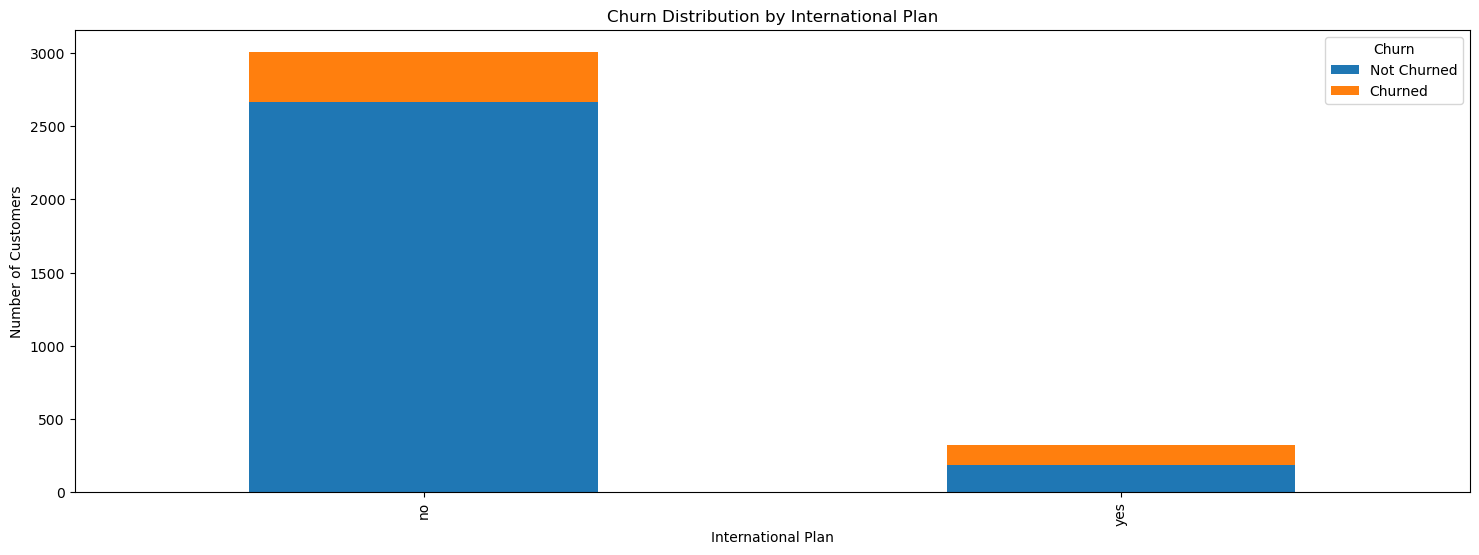

In [20]:
# Create stacked bar chart
df.groupby(["international plan", "churn"]).size().unstack().plot(
    kind='bar', stacked=True, figsize=(18,6)
)

# Add labels and title
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution by International Plan")

# Show legend
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Display the plot
plt.show()


### Observations:

- The vast majority of customers do not have an international plan. While the number of churned customers is greater in the "no international plan" group, the proportion of churn appears higher among those with an international plan.
- A large majority of the customer base does not use international plans. However, subscribers with the international plan have a higher portion of customer churn.

## Distribution of customer service calls for churned and non-churned customers.

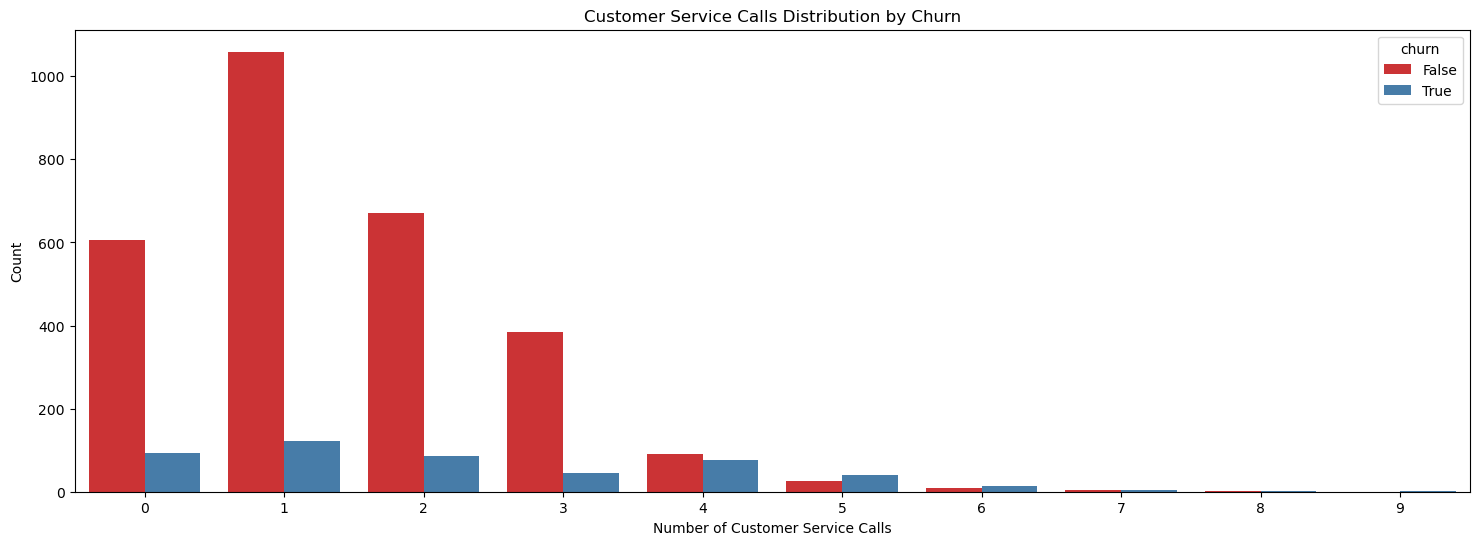

In [21]:
# Set figure size
plt.figure(figsize=(18, 6))

# Create count plot
sns.countplot(x='customer service calls', hue='churn', data=df, palette='Set1')

# Add labels and title
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.title('Customer Service Calls Distribution by Churn')

# Show plot
plt.show()


#### Observations 
- A higher number of customer service calls generally correlates with a higher churn rate. The "True" (churned) bars become more prominent relative to the "False" (not churned) bars as the number of calls increases.

- The majority of both churned and non-churned customers make 0-3 calls. However, even within this range, a visible difference in churn proportion exists.

- Customers who made 4 or more customer service calls have a significantly higher propensity to churn.

- There are a substantial number of customers who did not churn, even after making a few customer service calls.

## Churn within different states

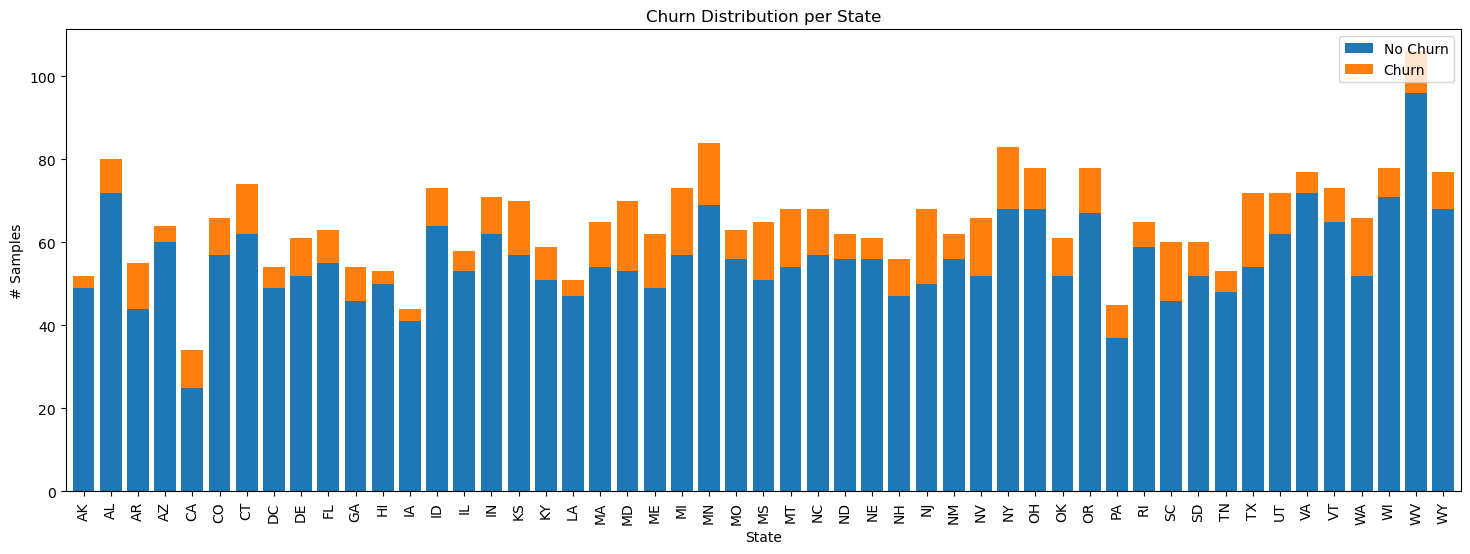

In [22]:
# Group by state and churn status
state_churn = df.groupby(["state", "churn"]).size().unstack()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(18, 6))

# Define colors for churned and non-churned
colors = ["#1f77b4", "#ff7f0e"]  # Blue for No Churn, Orange for Churn

# Create stacked bars
state_churn.plot(kind="bar", stacked=True, color=colors, ax=ax, width=0.8)

# Labels
ax.set_xlabel("State")
ax.set_ylabel("# Samples")
ax.set_title("Churn Distribution per State")
ax.legend(["No Churn", "Churn"], loc="upper right")
plt.xticks(rotation=90)  # Rotate state labels for readability

# Show plot
plt.show()


#### Observations 
- Some states have less proportion of customer with churn like AK, HI, IA and some have a higher proportion such as WA, MD and TX. This shows that we should incorporate the state into our further analysis, because it could be help to predict if a customer is going to churn.

## States above and below overall churn rate 

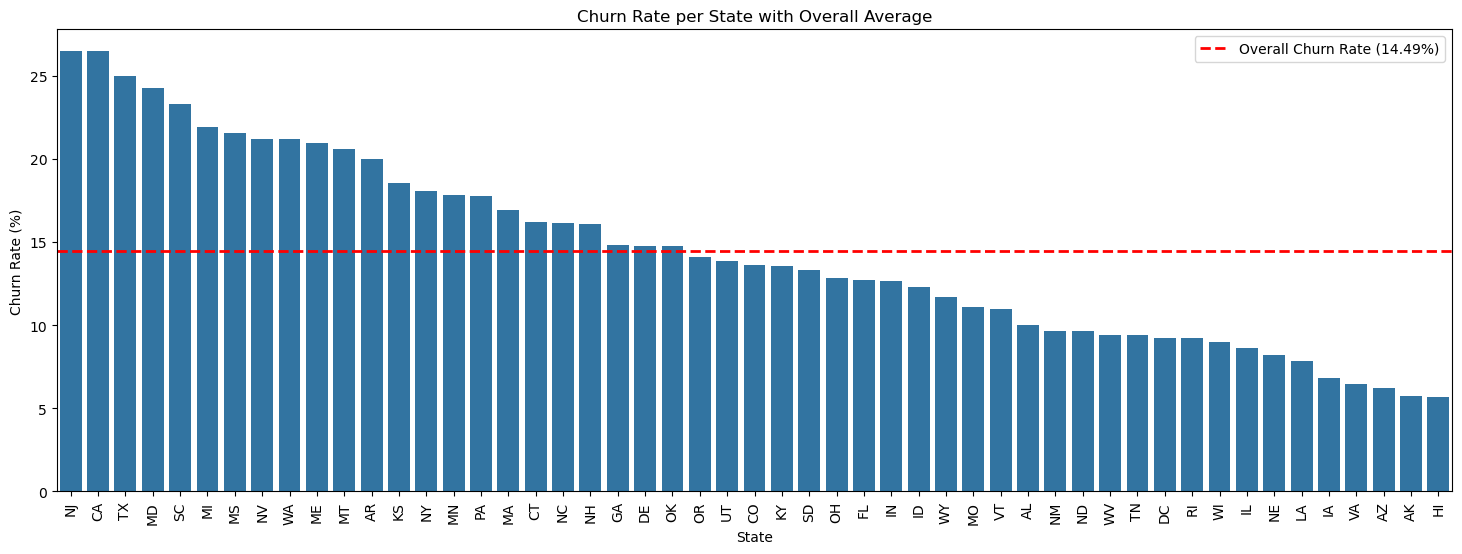

In [23]:
# Compute overall churn rate (convert to percentage)
overall_churn_rate = df["churn"].mean() * 100

# Compute churn rate per state (convert to percentage)
state_churn_rates = df.groupby("state")["churn"].mean().sort_values(ascending=False) * 100

# Plot bar chart
plt.figure(figsize=(18, 6))
sns.barplot(x=state_churn_rates.index, y=state_churn_rates.values)

# Add horizontal line for overall churn rate
plt.axhline(overall_churn_rate, color="red", linestyle="dashed", linewidth=2, label=f"Overall Churn Rate ({overall_churn_rate:.2f}%)")

# Labels & title
plt.xlabel("State")
plt.ylabel("Churn Rate (%)")  # Indicate percentage
plt.title("Churn Rate per State with Overall Average")
plt.xticks(rotation=90)  # Rotate state labels for better visibility
plt.legend()

# Show plot
plt.show()


#### Observations 

- Significant variation in churn rates exists across different states.
- Some states (e.g., NJ, CA, TX) have churn rates well above the overall average (14.49%).
- Other states (e.g., VA, AK, HI) have churn rates significantly below the overall average.
- The churn rate varies significantly based on location. New Jersey, California, and Texas are the largest states with a higher customer churn while Virginia, Alaska, and Hawaii all have churn rates at their minimum.
- There are likely external factors affecting churn rates, so it is useful to dive deeper into the differences of these states to see if changes could be made for other states.

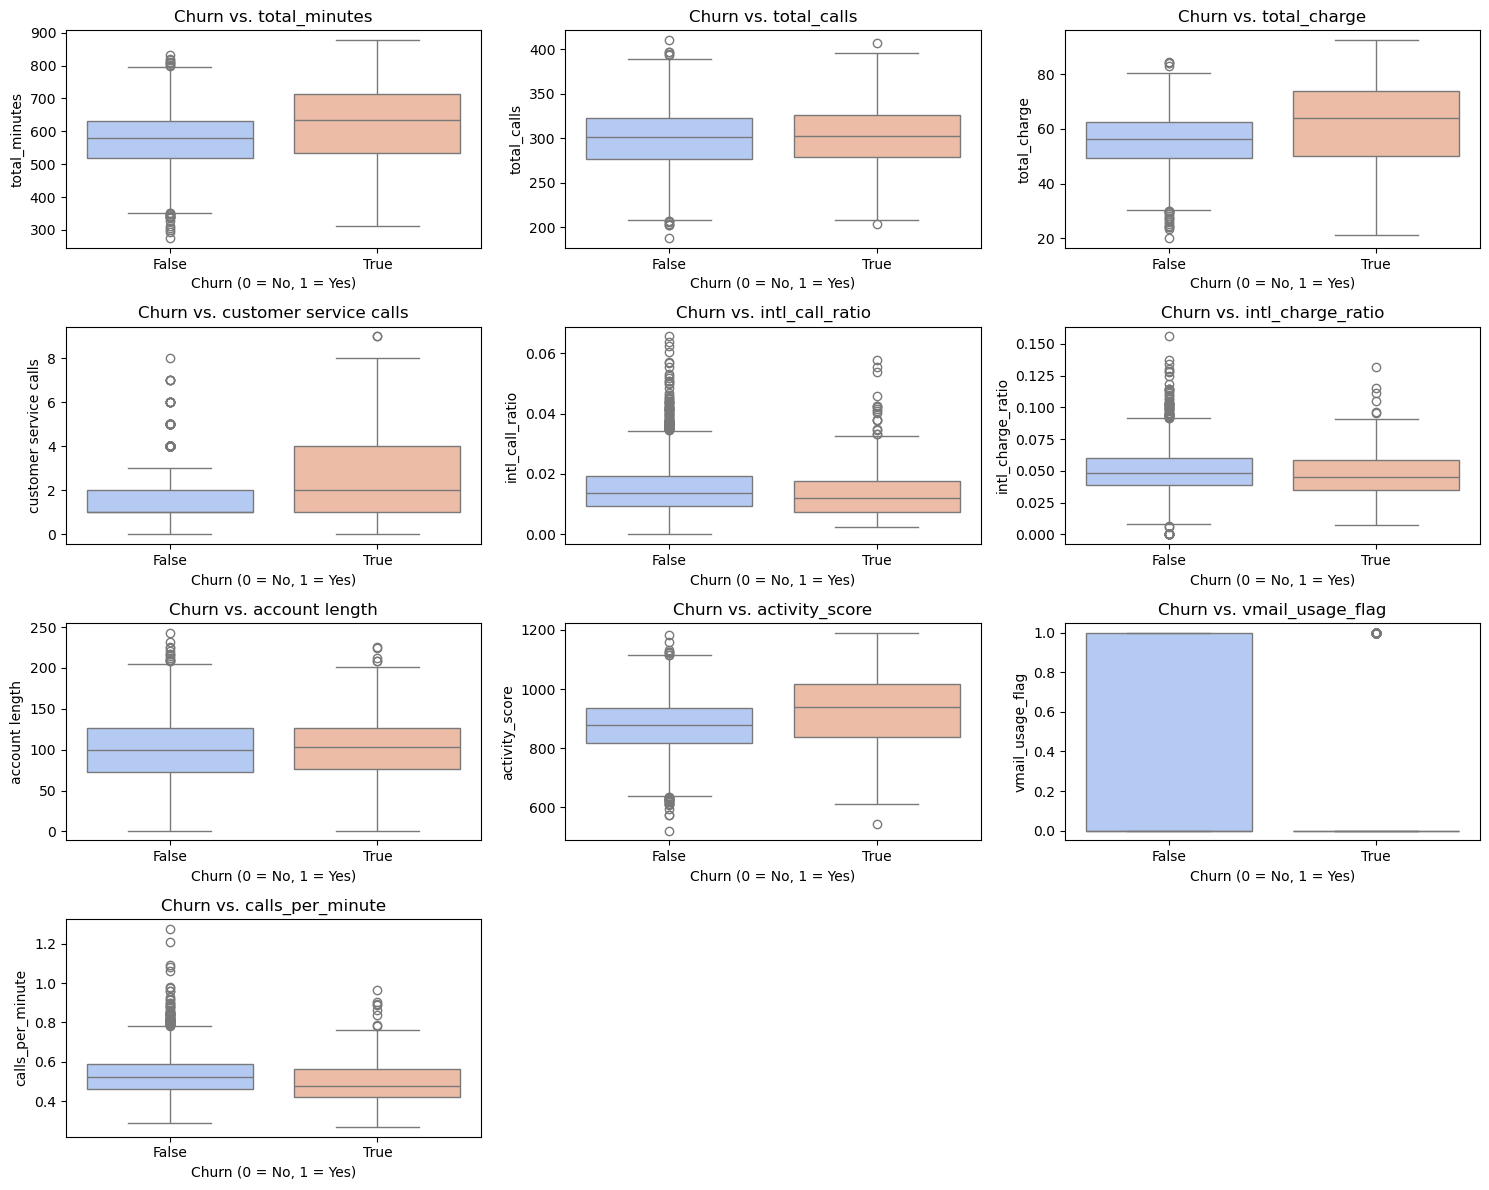

In [24]:
# List of key numerical features to analyze
features = ["total_minutes", "total_calls", "total_charge", 
            "customer service calls", "intl_call_ratio", 'intl_charge_ratio',
            "account length", "activity_score", "vmail_usage_flag", "calls_per_minute",]

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through features and create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df["churn"], y=df[feature], hue=df["churn"], palette="coolwarm", legend=False)
    plt.title(f"Churn vs. {feature}")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(feature)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Observations 
- Box plot analysis reveals key differences between churned and non-churned customers. Higher total minutes, higher customer service call volume, higher charges are strongly associated with churn. This points to potential issues with service quality, pricing, and customer support.
- While account length appears to have little impact, focusing on lowering customer service call volume and addressing potential dissatisfaction with high usage and billing are likely to be effective churn reduction strategies.
- Customers who actively use the service tend not to churn compared to those who don't."

## Bin customers on total Calls, Charge, and Minutes and determine churn 

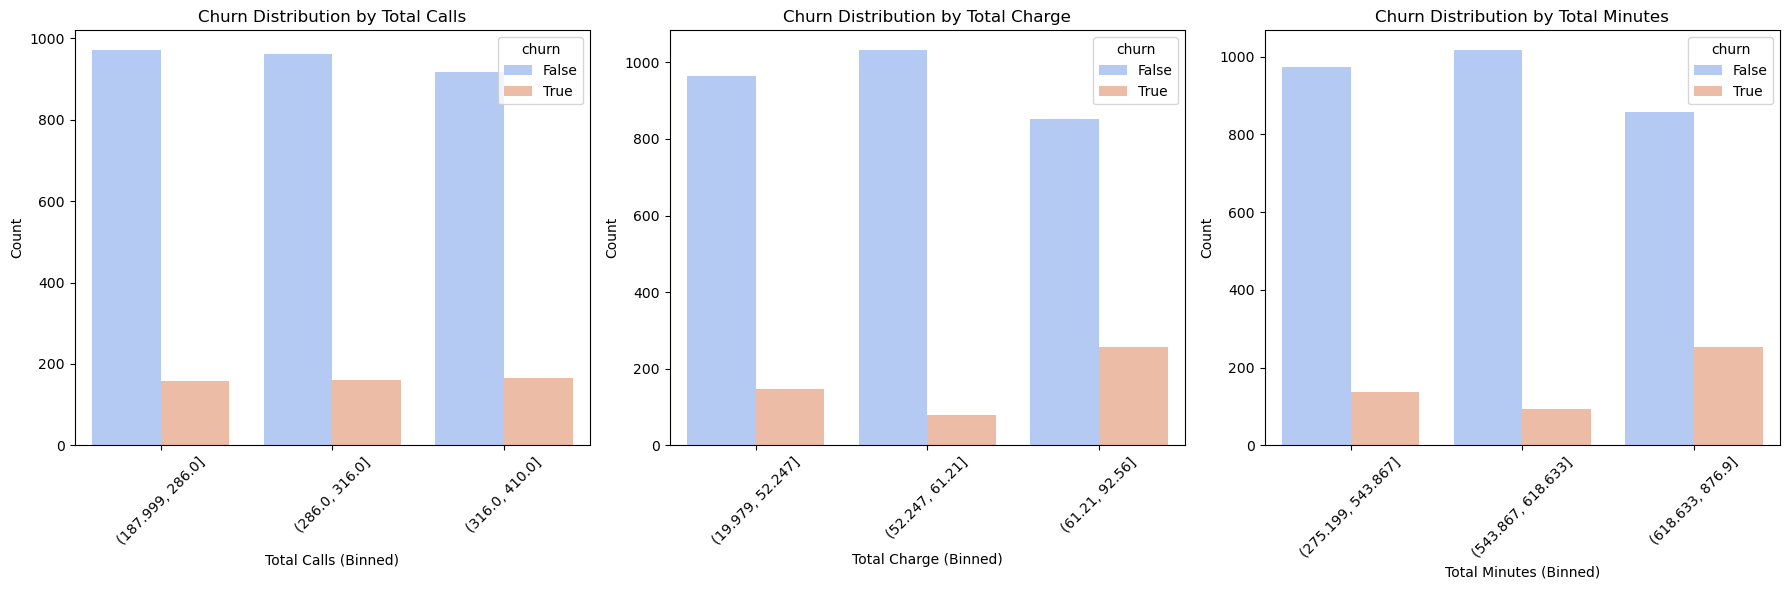

In [25]:
# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define binning for better visualization
df["calls_bin"] = pd.qcut(df["total_calls"], q=3, duplicates='drop')  # Bin total calls
df["charge_bin"] = pd.qcut(df["total_charge"], q=3, duplicates='drop')  # Bin total charge
df["minutes_bin"] = pd.qcut(df["total_minutes"], q=3, duplicates='drop')  # Bin total minutes

# Plot total calls vs churn
sns.countplot(x="calls_bin", hue="churn", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Churn Distribution by Total Calls")
axes[0].set_xlabel("Total Calls (Binned)")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot total charge vs churn
sns.countplot(x="charge_bin", hue="churn", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Churn Distribution by Total Charge")
axes[1].set_xlabel("Total Charge (Binned)")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Plot total minutes vs churn
sns.countplot(x="minutes_bin", hue="churn", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Churn Distribution by Total Minutes")
axes[2].set_xlabel("Total Minutes (Binned)")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Findings
- Across all three metrics, a substantial portion of customers do not churn regardless of the bin. This highlights that these metrics alone don't guarantee churn.

**1. Calls** 
- The number of churned customers is relatively consistent across all three total call bins. This contrasts a direct, linear relationship.
- The number of calls might be less significant than the nature of those calls. Customers who make few calls but have negative experiences might be as likely to churn as those making many calls.

**2. Total Charge**

- As the total charge increases, the number of non-churning customers starts to slightly decline in the highest charge bin, where the churning customers slightly increase.
- Customers with medium-high charges are the most vulnerable to churn.

**3. Total Minutes**
- Similar to total charge, as total minutes increase, churned customers increase to some level. Customer are vulnerable at mid to high usage.

**4. Conclusion** 
- The distribution of churn across binned total calls suggests that the nature of customer interactions, rather than merely the call volume, may be a stronger driver of churn. Customers who make a high amount of calls tend to churn more, so some marketing attention should be focused there. Also, the number of churning customers starts to increase, suggesting high charge and usage has a some direct correlation to customer churn.

## Bin customers on international minutes, charge and calls and analyze their churn rates.

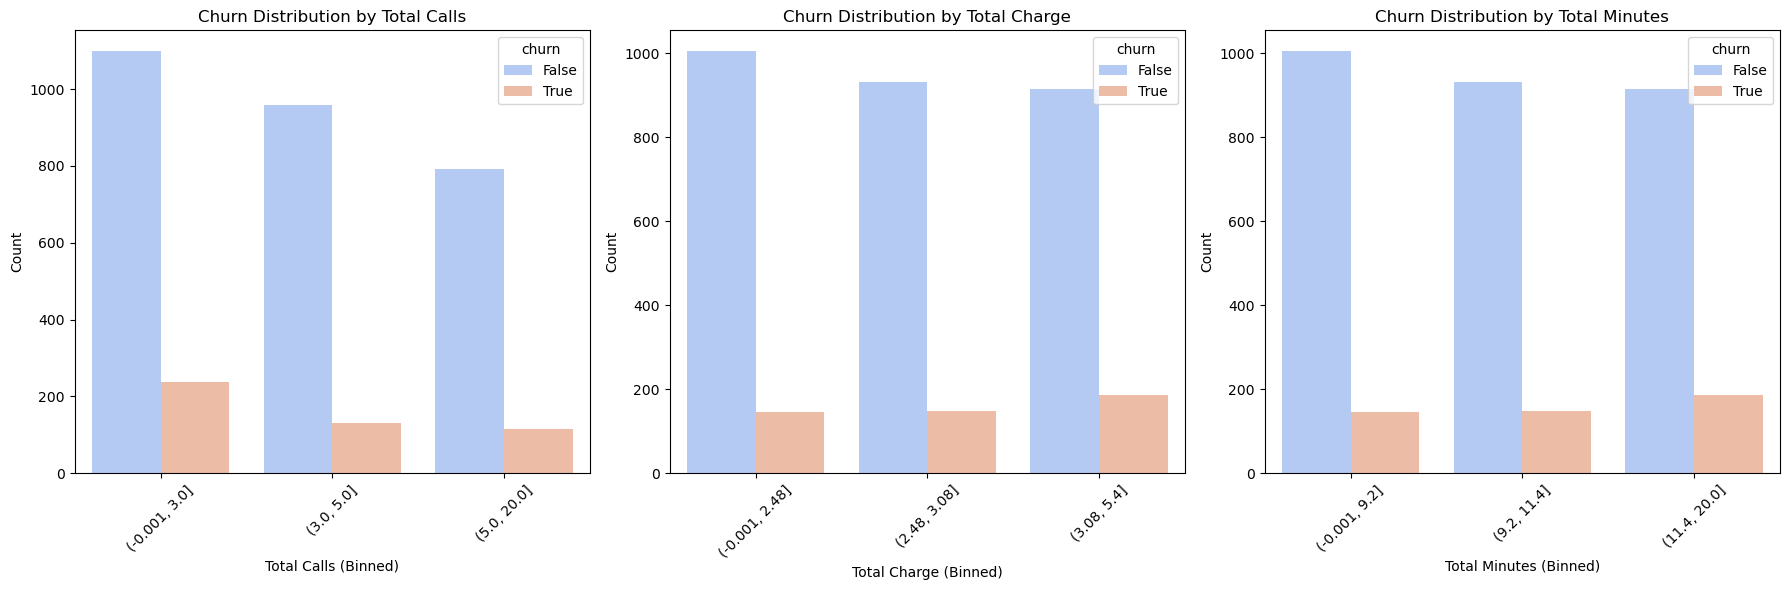

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define binning for better visualization
df["total intl minutes_bin"] = pd.qcut(df["total intl minutes"], q=3, duplicates='drop')  # Bin total calls
df["total intl calls_bin"] = pd.qcut(df["total intl calls"], q=3, duplicates='drop')  # Bin total charge
df["total intl charge_bin"] = pd.qcut(df["total intl charge"], q=3, duplicates='drop')  # Bin total minutes

# Plot total calls vs churn
sns.countplot(x="total intl calls_bin", hue="churn", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Churn Distribution by Total Calls")
axes[0].set_xlabel("Total Calls (Binned)")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot total charge vs churn
sns.countplot(x="total intl charge_bin", hue="churn", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Churn Distribution by Total Charge")
axes[1].set_xlabel("Total Charge (Binned)")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Plot total minutes vs churn
sns.countplot(x="total intl minutes_bin", hue="churn", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Churn Distribution by Total Minutes")
axes[2].set_xlabel("Total Minutes (Binned)")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Observations and Interpretations:

**1. International calls**

- Customers with the lowest calls have a much higher likelihood of churn compared to all other call volume ranges. Customer who have no need for making international calls, who signed up for those plans are the most likely to churn, since the plans can be expensive,

**2. International Charge**
- The lowest charge customers are much more likely to churn. 

**3. Total International Minutes.** 
- Customers with the lowest minutes churn a lot more compared to those with higher amounts of minutes. Those customers don't use the service and are likely to churn more.

**4. Conclusion**
- There is a great likelihood of churn for those with a low number of international calls, charge and minutes."
- Looking at our data, we should explore the reasons why people sign up for the international plans when they don't need them. Those customers are more likely to churn.

## Bin customers on account length and analyze their churn rates.

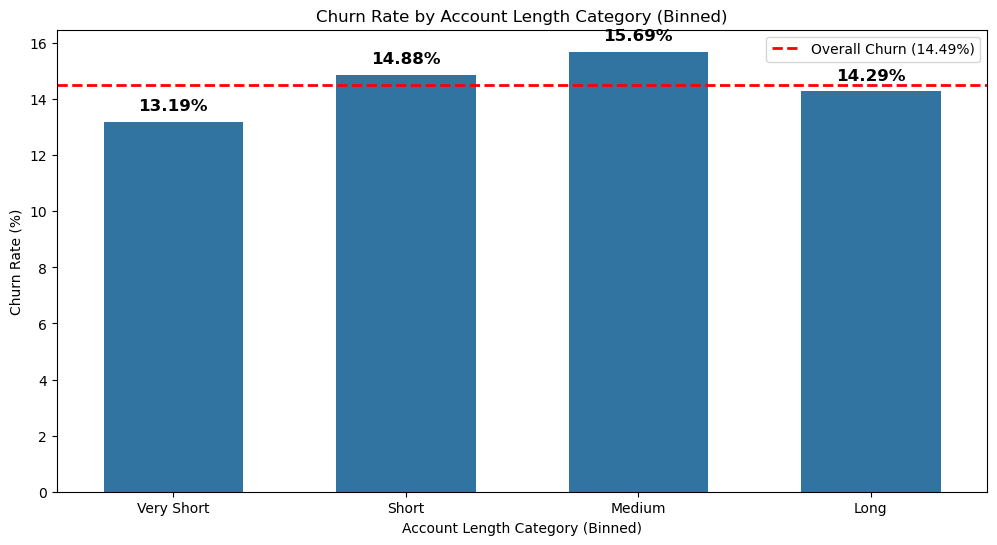

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define quantile-based bins (adjust `q` as needed)
df["account_length_bin"] = pd.qcut(df["account length"], q=4, labels=["Very Short", "Short", "Medium", "Long"], duplicates='drop')

# Compute churn rate for each bin
churn_rates = df.groupby("account_length_bin", observed=False)["churn"].mean() * 100


# Compute overall churn rate
overall_churn_rate = df["churn"].mean() * 100

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, width=0.6)

# Add horizontal line for overall churn rate
plt.axhline(overall_churn_rate, color="red", linestyle="dashed", linewidth=2, label=f"Overall Churn ({overall_churn_rate:.2f}%)")

# Annotate bars with churn percentages
for i, value in enumerate(churn_rates.values):
    plt.text(i, value + 0.4, f"{value:.2f}%", ha="center", fontsize=12, fontweight="bold", color="black")

# Labels & title
plt.xlabel("Account Length Category (Binned)")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Account Length Category (Binned)")
plt.legend()
plt.xticks(rotation=0)
plt.show()


### Observations 
- The churn rates vary slightly across the account length categories, but not drastically.

- "Medium" length accounts show the highest churn rate (15.69%), which is above the overall churn rate (14.49%).

- "Very Short" length accounts show the lowest churn rate (13.19%), which is below the overall churn rate.

- "Long" accounts have churn rates near the average churn rate.

**2. Interpretations/Insights:**

- Account length alone is not a strong predictor of churn. The relatively small differences between categories suggest that other factors are more influential.

- "Medium" account length warrants attention. The slightly elevated churn rate in this category could indicate specific problems. Perhaps these customers have passed the initial trial period but haven't yet developed strong loyalty, making them vulnerable to competitors.


### Bin customers on Customer Service Calls and Analyzing Churn Rates

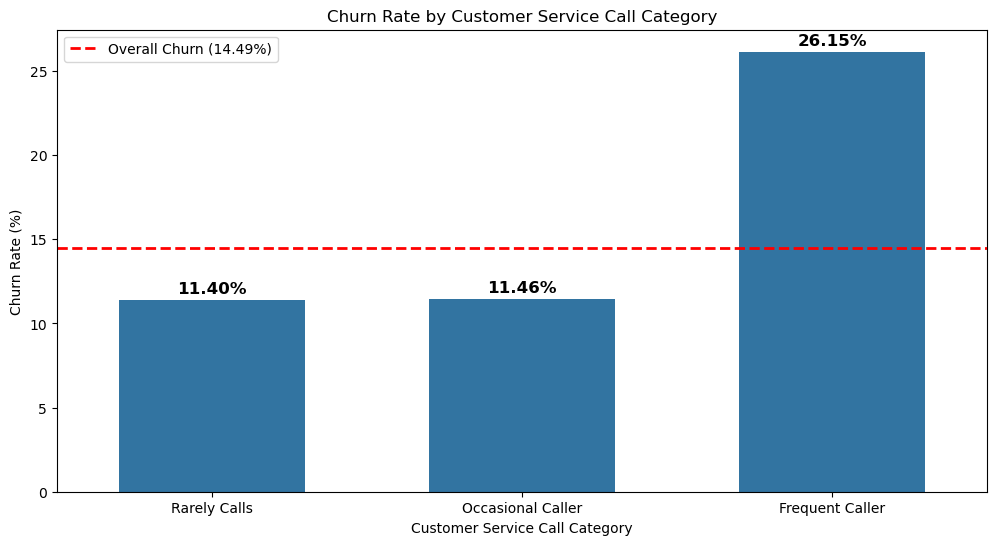

In [28]:
# Define quantile-based bins for customer service calls
df["service_calls_category"] = pd.qcut(
    df["customer service calls"], 
    q=3, 
    labels=["Rarely Calls", "Occasional Caller", "Frequent Caller"],#, "Very Frequent Caller"], 
    duplicates='drop'
)

# Compute churn rate for each service call category
churn_rates = df.groupby("service_calls_category", observed=False)["churn"].mean() * 100

# Compute overall churn rate
overall_churn_rate = df["churn"].mean() * 100

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, width=0.6)

# Add horizontal line for overall churn rate
plt.axhline(overall_churn_rate, color="red", linestyle="dashed", linewidth=2, label=f"Overall Churn ({overall_churn_rate:.2f}%)")

# Annotate bars with churn percentages
for i, value in enumerate(churn_rates.values):
    plt.text(i, value + 0.4, f"{value:.2f}%", ha="center", fontsize=12, fontweight="bold", color="black")

# Labels & title
plt.xlabel("Customer Service Call Category")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Customer Service Call Category")
plt.legend()
plt.xticks(rotation=0)
plt.show()


### Findings 
**1. Observations**

- There's a substantial difference in churn rates between the different customer service call categories.

- "Frequent Callers" exhibit a significantly higher churn rate (26.15%) compared to the overall churn rate (14.49%). This segment is a major churn risk.

- "Rarely Calls" and "Occasional Caller" segments both have churn rates below the overall average (11.40% and 11.46%, respectively).

**2. Interpretations/Insights:**

- Customer service interactions are a strong signal of customer satisfaction (or dissatisfaction).

- Focus on improving the experience for frequent callers. The extremely high churn rate in this group indicates serious problems. Investigate common issues reported by frequent callers and improve resolution rates.

- Potential to segment customer service strategies. Tailor customer service approaches based on calling frequency.

##  Churn rate (%) based on different combinations of voice mail plans and international plans

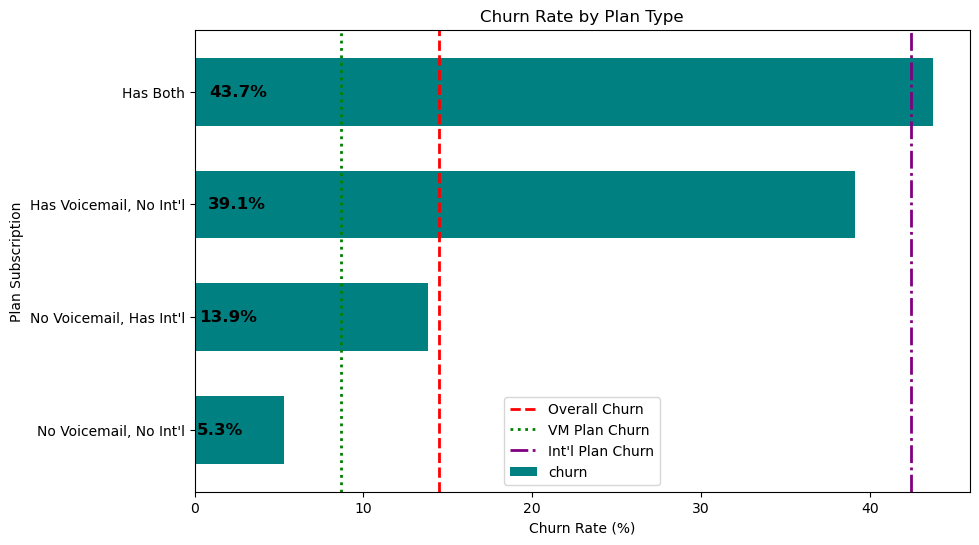

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute churn rates based on plan combinations
churn_by_plan = (df.groupby(['voice mail plan', 'international plan'])['churn'].mean() * 100)

# Define shorter labels for better readability
labels = {
    ('no', 'no'): "No Voicemail, No Int'l",
    ('no', 'yes'): "No Voicemail, Has Int'l",
    ('yes', 'no'): "Has Voicemail, No Int'l",
    ('yes', 'yes'): "Has Both"
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted size

# Plot horizontal bar chart with tighter spacing
churn_by_plan.sort_values().plot(kind='barh', ax=ax, width=0.6, color="teal")

# Update y-axis labels
ax.set_yticklabels([labels[idx] for idx in churn_by_plan.index])

# Add vertical lines with distinct colors
ax.axvline(x=df['churn'].mean() * 100, color='red', linestyle='dashed', linewidth=2, label="Overall Churn")
ax.axvline(x=df[df['voice mail plan'] == 'yes']['churn'].mean() * 100, color='green', linestyle='dotted', linewidth=2, label="VM Plan Churn")
ax.axvline(x=df[df['international plan'] == 'yes']['churn'].mean() * 100, color='purple', linestyle='dashdot', linewidth=2, label="Int'l Plan Churn")

# Annotate bars with churn percentage
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.1f}%', 
                (p.get_x() + 0.02 * width, p.get_y() + p.get_height() / 2),
                color='black', weight='bold', size=12, va='center')

# Labels & legend
ax.set_xlabel('Churn Rate (%)')
ax.set_ylabel('Plan Subscription')
ax.set_title('Churn Rate by Plan Type')
ax.legend()

# Show plot
plt.show()


### Observations:

- "Has Both" is the Highest Risk: Customers who have both a voice mail plan and an international plan have the highest churn rate by a significant margin (43.7%). This group represents a major area of concern.

- Voice Mail Plan Alone is Risky: Customers with only a voice mail plan ("Has Voicemail, No Int'l") have a high churn rate (39.1%).

- International Plan has churn rate close to the overall churn,: Customers who only have an international plan churns at some average rate 13.9%.

- "No Voicemail, No Int'l" is the Lowest Risk: Customers who have neither a voice mail plan nor an international plan have the lowest churn rate (5.3%).

#### Insights/Interpretations:

- Potential Interaction Effect: The high churn rate for customers with both plans suggests that the combination may be problematic. Perhaps the features or pricing of the combined plans don't meet customer expectations.

- Voice Mail Plan Issues: The high churn rate associated with only having a voice mail plan indicates underlying problems with that plan.

- International Plan may be a good standalone plan. The international plan seems to do well on its own, probably because this category of customers make use of it often.

#### Narrative Ideas:

- Combining voice mail and international services is a bad choice. Voice mail needs extra attention to see why people churn.

- Both the international plans and the voicemail plans increase churn. The problem is exacerbated when the customer has both. We need to find a better way to market these services.

## Statistical Tests to determine feature correlation with target variable

### Independent t-test for normal distribution features 
- To determine whether there are statistically significant differences in numerical features between churned and non-churned customers, 

####  Null and Alternative Hypotheses
- For each numerical feature:

**1. Null Hypothesis (H₀):** There is no significant difference in the mean values of the feature between churned and non-churned customers.

**2. Alternative Hypothesis (H₁):** There is a significant difference in the mean values of the feature between churned and non-churned customers.

- We use a significance level (α) of 0.05, meaning that if the p-value is below 0.05, we reject the null hypothesis in favor of the alternative.



In [30]:
from scipy.stats import ttest_ind

# List of normally distributed numerical columns
num_cols = df.select_dtypes(include = "number")

# Conduct independent t-test for normally distributed features
print("T-test Results:")
for col in num_cols:
    churned = df[df['churn'] == True][col]
    non_churned = df[df['churn'] == False][col]
    
    stat, p_value = ttest_ind(churned, non_churned, equal_var=False)  # Welch’s t-test
    print(f"{col}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")



T-test Results:
account length: p-value = 0.3365 (Not Significant)
number vmail messages: p-value = 0.0000 (Significant)
total intl minutes: p-value = 0.0001 (Significant)
total intl calls: p-value = 0.0032 (Significant)
total intl charge: p-value = 0.0001 (Significant)
customer service calls: p-value = 0.0000 (Significant)
total_minutes: p-value = 0.0000 (Significant)
total_calls: p-value = 0.2651 (Not Significant)
total_charge: p-value = 0.0000 (Significant)
calls_per_minute: p-value = 0.0000 (Significant)
avg_call_duration: p-value = 0.0000 (Significant)
activity_score: p-value = 0.0000 (Significant)
activity_index: p-value = 0.0000 (Significant)
intl_call_ratio: p-value = 0.0012 (Significant)
intl_minutes_ratio: p-value = 0.2037 (Not Significant)
intl_charge_ratio: p-value = 0.0283 (Significant)
customer_service_call_ratio: p-value = 0.0000 (Significant)
vmail_usage_flag: p-value = 0.0000 (Significant)


### Conclusions
**1. Non-Significant Features (Fail to Reject H₀):**

- **`account length`, `total_calls`, `intl_minutes_ratio`**: These features do not show statistically significant differences between churned and non-churned customers, suggesting they may not be strong predictors of churn.

** 2.Significant Features (Reject H₀):**

**`number vmail messages`, `total intl minutes`, `total intl calls`, `total intl charge`, `customer service calls`, `total_minutes, total_charge, calls_per_minute, avg_call_duration, activity_score, activity_index, intl_call_ratio, intl_charge_ratio, customer_service_call_ratio, and vmail_usage_flag (all p < 0.05).`**
These features exhibit significant differences between churned and non-churned customers, indicating that they may have a meaningful relationship with customer churn and could be valuable for predictive modeling.

### Mann-Whitney test for features asymmetric distribution features 

In [31]:
from scipy.stats import mannwhitneyu

# List of non-normal columns
non_normal_cols = ["number vmail messages", "total intl calls", "customer service calls"]

# Conduct Mann-Whitney U test for non-normal features
print("\nMann-Whitney U Test Results:")
for col in non_normal_cols:
    churned = df[df['churn'] == True][col]
    non_churned = df[df['churn'] == False][col]
    
    stat, p_value = mannwhitneyu(churned, non_churned, alternative='two-sided')
    print(f"{col}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")



Mann-Whitney U Test Results:
number vmail messages: p-value = 0.0000 (Significant)
total intl calls: p-value = 0.0000 (Significant)
customer service calls: p-value = 0.0000 (Significant)


**`number vmail messages`, `total intl calls`, `customer service calls` (all p < 0.05).**
These features exhibit significant differences between churned and non-churned customers, indicating that they may have a meaningful relationship with customer churn and could be valuable for predictive modeling.

## Drop columns 

In [32]:
df = df.drop(columns=["state", 'phone number', 'service_call_category', 'account_length_category',
                      'calls_bin', 'charge_bin', 'minutes_bin', 'account_length_bin', 'service_calls_category',
                     ' total intl minutes_bin', 'total intl calls_bin', 'total intl charge_bin',
                      'account_length_bin', 'service_calls_category', 'total intl minutes_bin' 
                       ], errors='ignore') #'total intl minutes', 'total intl calls', 'total intl charge'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   international plan           3333 non-null   object 
 2   voice mail plan              3333 non-null   object 
 3   number vmail messages        3333 non-null   int64  
 4   total intl minutes           3333 non-null   float64
 5   total intl calls             3333 non-null   int64  
 6   total intl charge            3333 non-null   float64
 7   customer service calls       3333 non-null   int64  
 8   churn                        3333 non-null   bool   
 9   total_minutes                3333 non-null   float64
 10  total_calls                  3333 non-null   int64  
 11  total_charge                 3333 non-null   float64
 12  calls_per_minute             3333 non-null   float64
 13  avg_call_duration 

# Modeling 

In [33]:
# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
import collections

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

## Label encoding of categorical columns 

In [34]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Encode 'international plan' and 'voice mail plan' (Yes → 1, No → 0)
df["international plan"] = le.fit_transform(df["international plan"])
df["voice mail plan"] = le.fit_transform(df["voice mail plan"])

# Encode 'churn' (False → 0, True → 1)
df["churn"] = df["churn"].astype(int)  # Directly converting bool to int

# Display updated dataframe (first few rows)
df.head()


,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,avg_call_duration,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,intl_charge_ratio,customer_service_call_ratio,vmail_usage_flag
0,128,0,1,25,10.0,3,2.70,1,0,707.2,300,72.86,0.423609,2.349502,1007.2,2,0.009967,0.014120,0.036556,0.003322,1
1,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54,0.537143,1.853030,940.5,1,0.009091,0.022367,0.065440,0.003030,1
2,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00,0.620977,1.602432,855.2,1,0.015198,0.023097,0.054833,0.000000,0
3,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02,0.443491,2.241767,806.2,0,0.028112,0.011803,0.026962,0.008032,0
4,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36,0.707894,1.405882,857.9,1,0.008403,0.020084,0.054210,0.008403,0


## Selecting features and target variable 

In [35]:
# Drop null values
df = df.dropna()

# Defining the dependent variables/features
X = df.drop(columns=['churn'])

# Target variable
y = df['churn']

# Split into training and temporary sets (70% train, 30% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)



## Standard Scaling 

In [36]:

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data
X_test_scaled = scaler.transform(X_test)



## Logistic Regression 

In [37]:
# Define the XGBoost Classifier model with explicit eval_metric
lg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lg_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = lg_model.predict(X_train_scaled)

In [38]:
# Print the classification report
print('Classification Report on Training Set:')
print(classification_report(y_train, y_train_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_train, y_train_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1995
           1       0.60      0.27      0.37       338

    accuracy                           0.87      2333
   macro avg       0.74      0.62      0.65      2333
weighted avg       0.85      0.87      0.85      2333

Confusion Matrix on testing Set:
[[1935   60]
 [ 247   91]]


### Testing 

In [39]:
y_test_pred = lg_model.predict(X_test_scaled)
# Print the classification report
print('Classification Report on Testing Set:')
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.59      0.28      0.38       145

    accuracy                           0.87      1000
   macro avg       0.74      0.62      0.65      1000
weighted avg       0.84      0.87      0.85      1000

Confusion Matrix on testing Set:
[[826  29]
 [104  41]]


### ROC and PR curves 

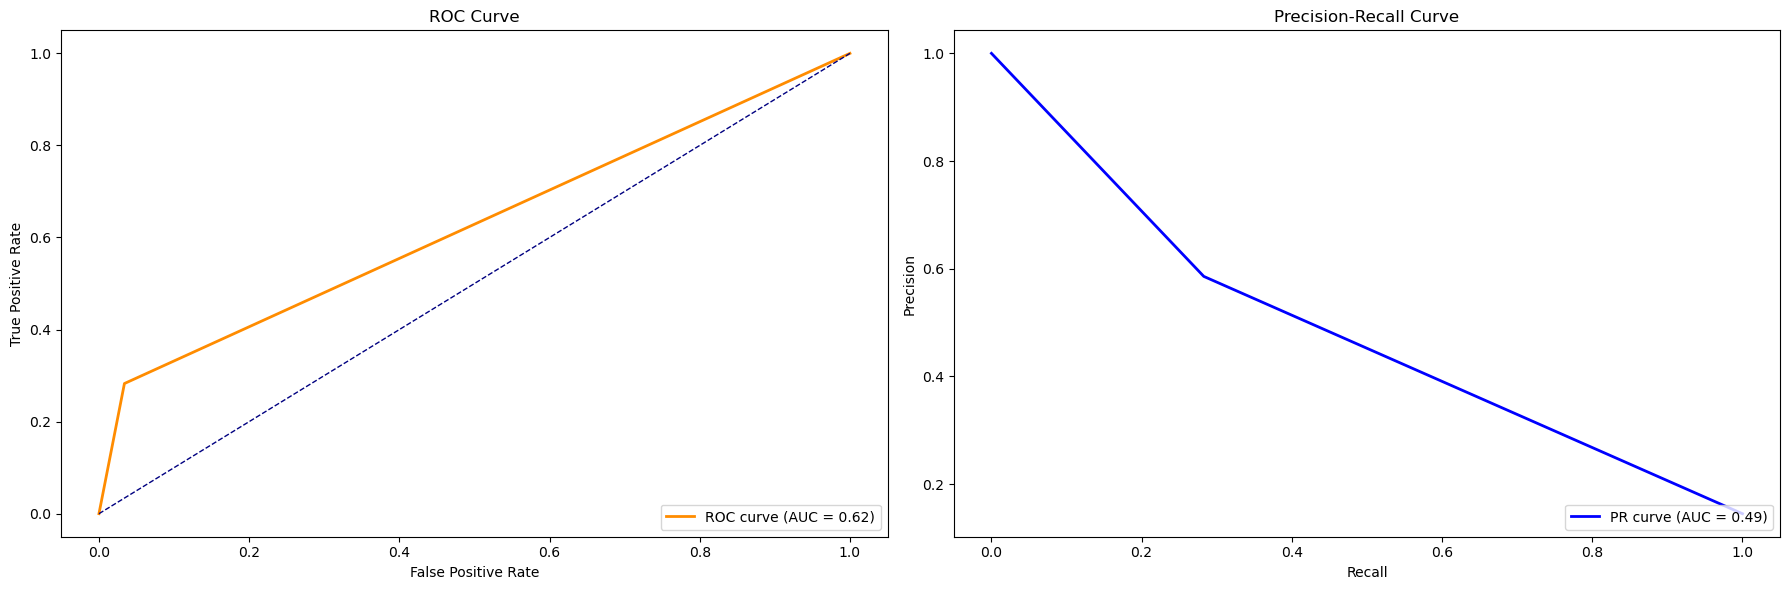

In [40]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()

### ROC-AUC (0.62) vs. PR-AUC (0.49)
- **ROC-AUC (0.62):** Shows the model is only slightly better than random guessing (0.5). However, ROC can be misleading in imbalanced datasets since it considers both classes equally.
- **PR-AUC (0.49):** More informative for class imbalance as it focuses on how well the model identifies churners (minority class). A low score confirms the model struggles with churn detection.

# Model 1: Logistic Regression (Baseline Model)
The Logistic Regression model, while achieving an overall accuracy of 87%, demonstrates unacceptably poor performance in identifying customers at risk of churning. Its failure to reliably identify potential churners severely limits its practical value for SyriaTel. The low recall for the churn class (approximately 28% on the test set) means the model misses a large proportion of at-risk customers, rendering it unreliable for proactive intervention and revenue protection.

### Training Set Performance
- Precision (Class 1 - Churners) = 0.60, indicating it is 60% accurate/correct when predicting churn. Recall for Class 1 Churners is 0.27, meaning the model only catches 27% of the actual churners.

### Testing Set Performance
- Precision (Class 1 - Churners): 0.59, slightly lower than in training. Recall (Class 1 - Churners): 0.28, still very low, meaning the model is missing a lot of churners.

### Confusion Matrix Insights
- The model correctly predicts most non-churners (Class 0) but struggles to identify churners (Class 1). On the test set, out of 145 actual churners, it only correctly predicts 41 (low recall). It misclassifies 104 churners as non-churners, which is risky since these customers could leave without any intervention.


## **Model Performance and Reliability:**

- The model falls short of meeting SyriaTel's core business objectives. The model's poor recall directly translates to a high number of missed opportunities for targeted intervention. Given its inability identify at-risk customers, it is **not reliable** for churn prediction in the context of SyriaTel's business objectives. Alternative modeling techniques are essential to improve the identification of at-risk customers. We will proceed with models designed to handle imbalanced data more effectively to reach the business goal 


# Model 2: Decision Tree 

In [41]:
# Define the decision tree Classifier model 
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = dt_model.predict(X_train_scaled)

In [42]:
y_test_pred = dt_model.predict(X_test_scaled)
# Print the classification report
print('Classification Report on Testing Set:')
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print('Confusion Matrix on Testing Set:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       855
           1       0.84      0.81      0.82       145

    accuracy                           0.95      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix on Testing Set:
[[833  22]
 [ 28 117]]


### Decision tree cross validation 

In [43]:
# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the Logistic Regression model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and compute the F1 score
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=kf, scoring='recall')

# Print cross-validation results
print("Cross-validation Recall Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

Cross-validation Recall Scores: [0.91176471 0.85294118 0.70588235 0.78787879 0.87878788 0.88235294
 0.88235294 0.79411765 0.91176471 0.79411765]
Mean F1 Score: 0.8401960784313726


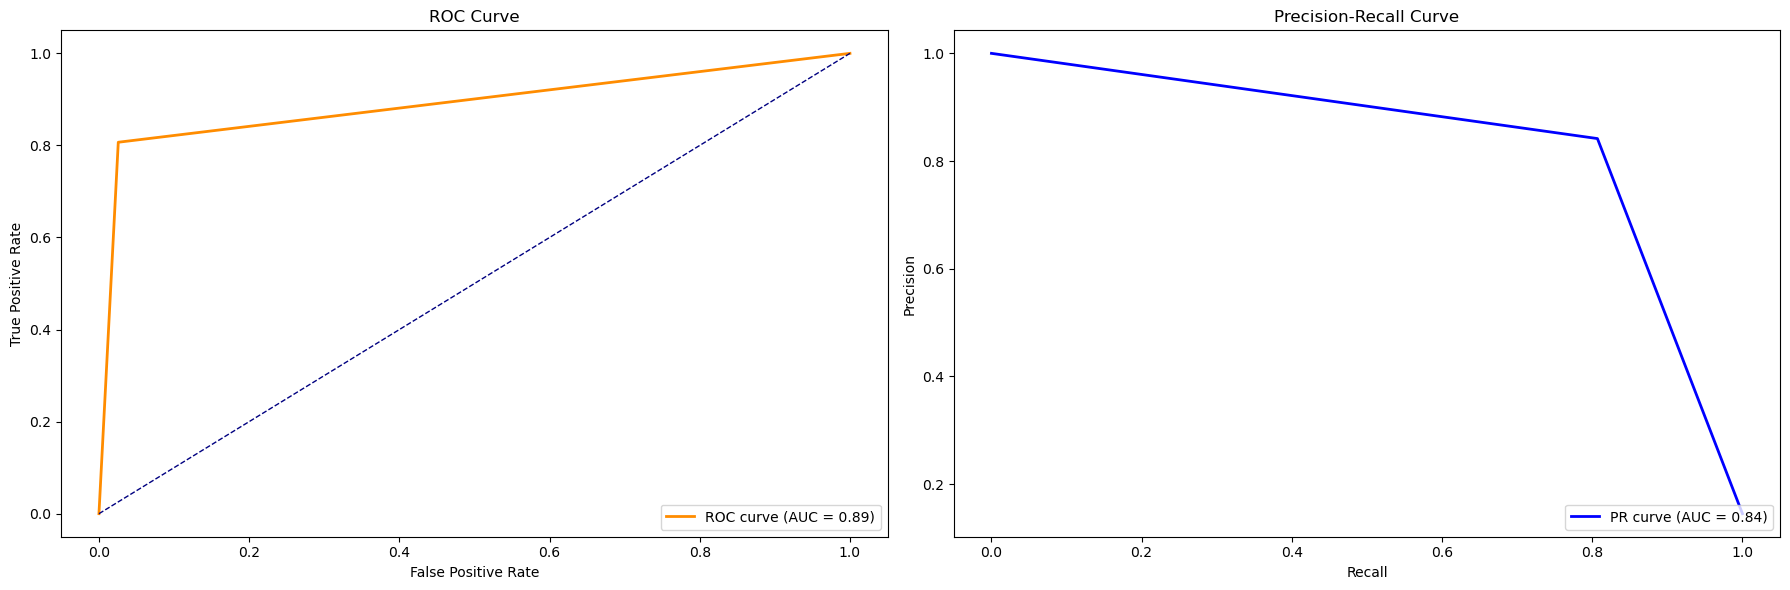

In [44]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()

## Model 2: Decision Tree – Performance Evaluation

#### 1. Decision Tree Model: Performance and Comparison to Baseline

**Objective:**
The primary goal is to improve upon the Logistic Regression baseline model, particularly in identifying potential churners, to enable proactive intervention and minimize revenue loss for SyriaTel. We focus on maximizing the recall score for the churn class (Class 1).


#### 2. Model Performance vs. Logistic Regression

| Metric                          | Logistic Regression | Decision Tree | Improvement?                         |
|---------------------------------|---------------------|---------------|--------------------------------------|
| **Accuracy**                    | 87%                 | 95%           | ✅ Higher overall correctness        |
| **Recall (Churners - Class 1)** | 28%                 | 81%           | ✅ Much better at catching churners   |
| **Precision (Churners - Class 1)** | 59%              | 84%           | ✅ Fewer false churn predictions     |
| **F1-Score (Churners - Class 1)** | 38%               | 82%           | ✅ Stronger balance of precision & recall |
| **ROC-AUC**                     | 0.62                | 0.89          | ✅ Better class separation           |
| **PR-AUC**                      | 0.49                | 0.84          | ✅ Much stronger focus on churners   |


#### 3. Key Observations
- **Significantly Higher Recall (81%)**: The decision tree captures 81% of churners versus 28% in logistic regression, a substantial improvement in identifying at-risk customers.
- **Lower False Negatives**: Only 28 churners are misclassified compared to 104 with logistic regression, aligning with the business objective of minimizing missed churners.
- **Improved Stability**: Cross-validation yields a mean recall of 0.84,(between 0.91 and 0.70)  demonstrating consistent performance across different data splits.


#### 4. Business Impact
- **Enhanced Churn Prevention**: With improved recall, the model enables timely interventions for a larger portion of at-risk customers, reducing potential revenue loss.
- **Balanced Trade-Off**: Although some loyal customers might be misclassified, the cost is justified by the significant reduction in false negatives.
- **Alignment with Objectives**: The Decision Tree model meets SyriaTel's business priorities better by effectively identifying customers likely to churn.

#### 5. Conclusion & Next Steps
The Decision Tree model shows clear improvement over the baseline logistic regression model in every key metric. Its substantially higher recall score, stable cross-validation performance, and improved AUC scores make it a far more reliable tool for identifying at-risk customers Despite potential overfitting concerns inherent to decision trees, its performance validates the move towards more flexible models. This model seems to be a good decision but lets see what improvements and other algorithms have to offer to our problem.


## Feature Importance 

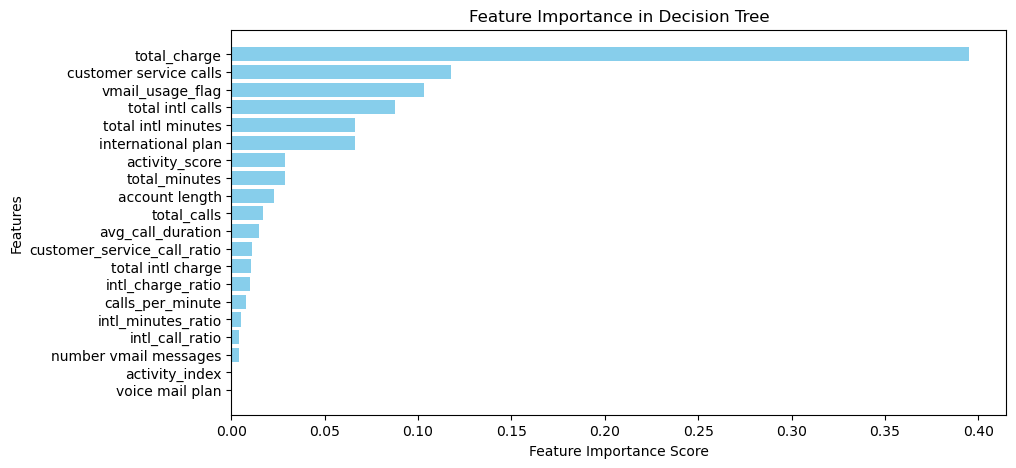

In [45]:
# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = dt_model.feature_importances_

# Convert X_train_scaled to a DataFrame if needed
feature_names = X_train.columns  # Use original DataFrame column names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[:]

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### Observations 
- The Decision Tree classifier identified total_charge as the most dominant predictor of customer churn, with an importance score of nearly 0.4. This is followed by customer service calls and voicemail usage flag as the next most influential features, both with scores around 0.15. 
- International call-related metrics (total calls and minutes) also show moderate importance. This suggests that customer retention is most strongly influenced by billing amounts, followed by customer service interaction levels and international usage patterns. 
- The relatively low importance of features like voice mail plan and activity index indicates these factors play a minimal role in predicting churn behavior.

# Correcting class imbalance using SMOTE 

In [46]:
# Initialize SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.6, k_neighbors=5)

# Apply SMOTE to generate synthetic samples
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [47]:
# Data labels before SMOTE:

collections.Counter(y_train)

Counter({0: 1995, 1: 338})

In [48]:
# Data labels after SMOTE:

collections.Counter(y_train_res)

Counter({0: 1995, 1: 1197})

In [49]:
dt_model = DecisionTreeClassifier()

# Train the model on the resampled dataset
dt_model.fit(X_train_res, y_train_res)

# Make predictions on the test set (not resampled)
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       855
           1       0.71      0.79      0.75       145

    accuracy                           0.92      1000
   macro avg       0.84      0.87      0.85      1000
weighted avg       0.93      0.92      0.93      1000

[[809  46]
 [ 30 115]]


### ROC and PR curves 

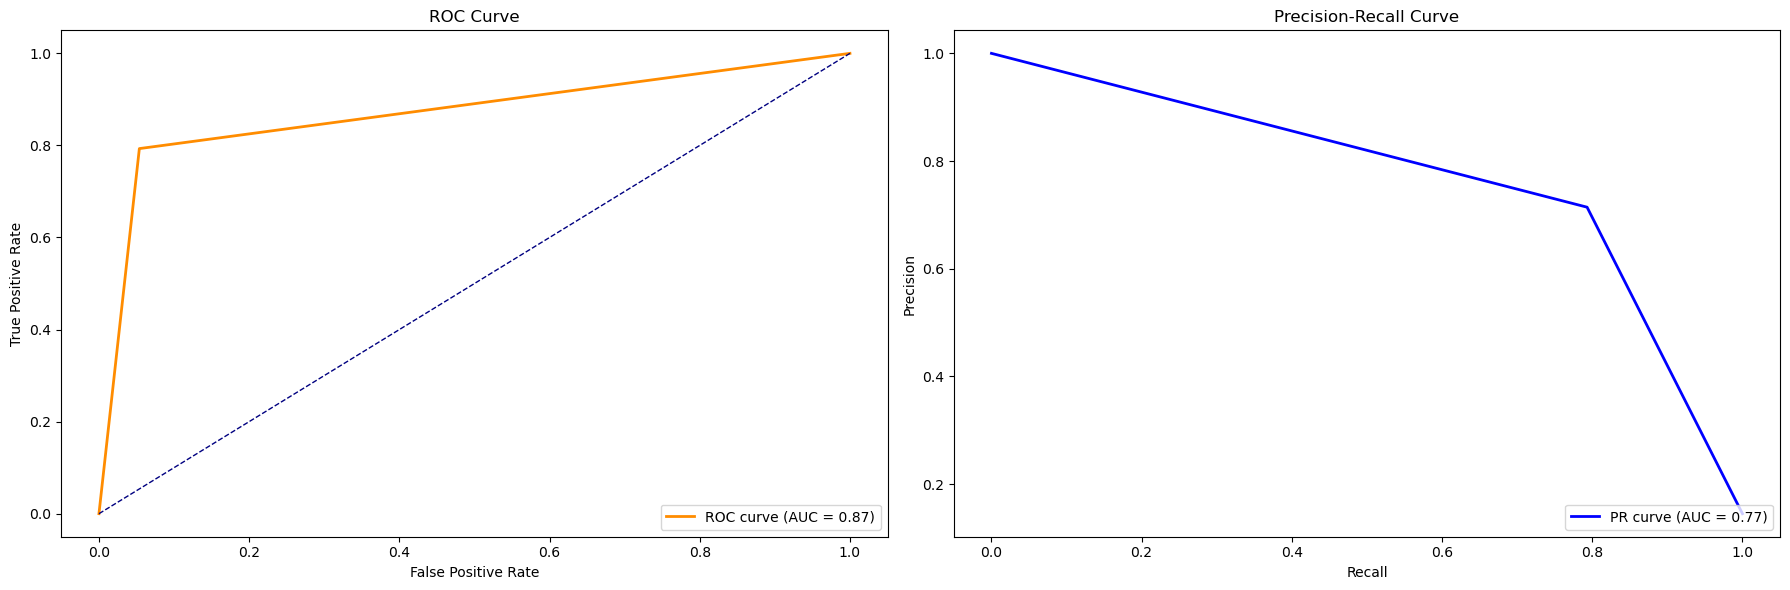

In [50]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()


### Decision Tree with SMOTE: Performance and Comparison

#### **1. Decision Tree with SMOTE: Performance and Comparison**

**Objective:** The primary goal is to determine if applying SMOTE (Synthetic Minority Oversampling Technique) to the dataset further improves the Decision Tree model's ability to identify potential churners. We remain focused on maximizing the recall score for the churn class (Class 1).

### **2. Model Performance vs. Decision Tree (Without SMOTE)**

| Metric                          | Decision Tree (No SMOTE) | Decision Tree (With SMOTE) | Improvement?                         |
|---------------------------------|--------------------------|---------------------------|--------------------------------------|
| **Accuracy**                    | 95%                      | 92%                       | ❌ Slightly Lower Overall Correctness        |
| **Recall (Churners - Class 1)** | 81%                      | 80%                       | ❌ Slightly worse at catching churners   |
| **Precision (Churners - Class 1)** | 84%                      | 70%                       | ❌ More false churn predictions            |
| **F1-Score (Churners - Class 1)** | 82%                      | 75%                       | ❌ Weaker balance of precision & recall       |
| **ROC-AUC**                     | 0.89                     | 0.87                      | ❌ Slightly worse class separation           |
| **PR-AUC**                      | 0.84                     | 0.77                      | ❌ Weaker focus on churners   |

#### **3. Key Observations**

*   **Slightly Lower Recall (80%):** The Decision Tree with SMOTE captures slightly fewer churners (80%) compared to the Decision Tree without SMOTE (81%).
*   **Lower Precision (70%):** The precision drops significantly from 84% to 70%, indicating a higher rate of false positives (more loyal customers incorrectly classified as churners).
*   **Reduced AUC Scores:** Both ROC-AUC and PR-AUC scores are lower with SMOTE (0.87 and 0.77 respectively), suggesting a reduced ability to distinguish between churners and non-churners.

#### **4. Business Impact**

*   **Increased Unnecessary Intervention:** The lower precision implies that SyriaTel would be incorrectly targeting more loyal customers with churn prevention efforts, leading to unnecessary costs and potentially irritating valued customers.
*   **Marginal Reduction in Missed Churners, But At a Cost:** While the slight decrease in recall isn't dramatic, the significant drop in precision makes the overall impact negative. The cost of potentially alienating loyal customers outweighs the marginal benefit of catching a few extra churners.

#### **5. Conclusion & Next Steps**

Applying SMOTE to the dataset *did not* improve the Decision Tree model's performance. In fact, it led to a decrease in both precision and AUC scores, with only a marginal change in recall. The increased rate of false positives makes the SMOTE-enhanced model less desirable for SyriaTel, given the business objective of minimizing wasted intervention efforts.

#### **Recommendation:**

Based on these results, **we should not use SMOTE with the Decision Tree model**. The original Decision Tree model provides a better balance between recall and precision, and its superior AUC scores indicate a greater ability to effectively distinguish between churners and non-churners. We will stick to the results we were able to get from the decision tree before applying smote as it better fits the goal.

# Hyperparameter search using Randomized search

In [73]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)


# Define the hyperparameter grid for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 7, 10, 15, 25],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 50, 200],
    'min_impurity_decrease': np.linspace(0.0, 0.1, 5).astype(np.float64),
    'random_state': [42]  # Ensures reproducibility
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist, scoring='recall',
    cv=3, n_iter=200, n_jobs=-1, random_state=42, error_score='raise'
)

In [74]:
# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best model from the random search
best_dt_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Print the classification report for the best model
print("Classification Report for Best Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))

# Print the best hyperparameters found during the search
print("Best Hyperparameters:", random_search.best_params_)


Classification Report for Best Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       855
           1       0.84      0.78      0.81       145

    accuracy                           0.95      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.95      0.95      0.95      1000

[[834  21]
 [ 32 113]]
Best Hyperparameters: {'splitter': 'best', 'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}


### ROC and PR Curves after hyperparameter search 

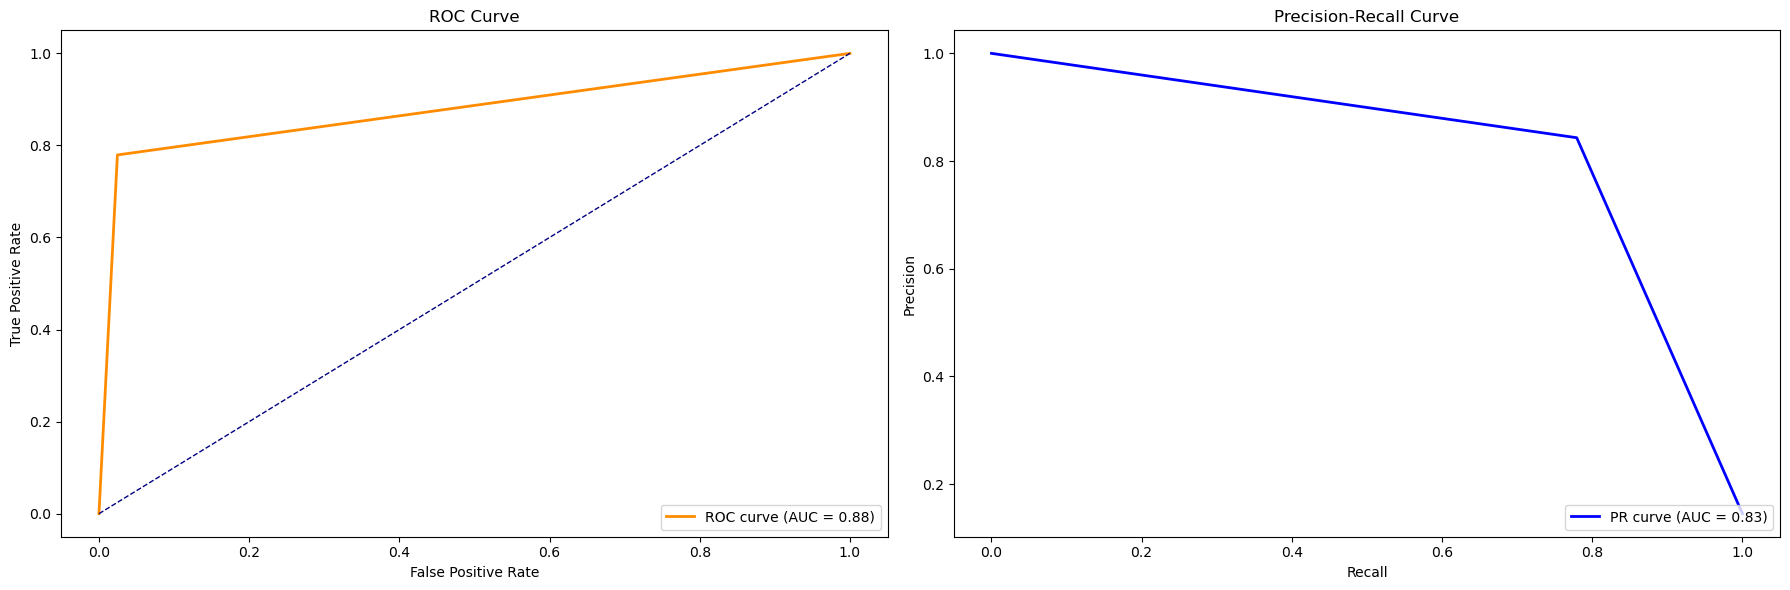

In [69]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_dt)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()


### Model 4: Optimized Decision Tree (Hyperparameter Tuning)  

### 1. Performance Comparison  

| Metric                          | Default Decision Tree | Optimized Decision Tree | Change? |
|---------------------------------|----------------------|----------------------|---------|
| **Accuracy**                    | 94%                  | 94%                  | ➖ No change |
| **Recall (Churners - Class 1)** | 81%                  | 79%                  | ⬇ Slight decrease |
| **Precision (Churners - Class 1)** | 79%               | 82%                  | ✅ Higher precision |
| **F1-Score (Churners - Class 1)** | 80%               | 80%                  | ➖ No significant change |
| **ROC-AUC**                     | 0.89                 | 0.88                 | ➖ Minimal decrease |
| **PR-AUC**                      | 0.82                 | 0.82                 | ➖ No change |

### 2. Key Observations  
- **Slightly Lower Recall (79% vs. 81%)**: The model now detects slightly fewer churners.  
- **Higher Precision (82% vs. 79%)**: The model **reduces false churn predictions**, meaning **fewer loyal customers are mistakenly classified as churners**.  
- **Stable PR-AUC (0.82)**: The model maintains its ability to prioritize actual churners effectively.  

### 3. Business Impact  
- **Fewer False Positives**: The model avoids offering unnecessary retention incentives to loyal customers.  
- **Churn Prevention Still Effective**: Despite a minor drop in recall, the model **maintains strong churn detection** with balanced precision and recall.  
- **No Significant ROC-AUC Drop**: The model’s class separation ability remains nearly the same, ensuring reliable predictions.  

### 4. Conclusion & Next Steps  
While the **recall for churners slightly decreased**, the model **became more precise** in its predictions. The overall **F1-score and PR-AUC remain stable**, indicating that the trade-off is reasonable.  

**Next Step: Implementing Random Forest** to see if it can further improve performance while generalizing better. 🚀  


## Decision Tree Model: Hyperparameter Tuning with Random Search

**1. Decision Tree Model: Hyperparameter Tuning with Random Search**
The primary goal is to improve the Decision Tree model's performance by tuning its hyperparameters using Random Search, with a focus on maximizing recall for the churn class (Class 1) while maintaining acceptable precision. 

**2. Model Performance vs. Default Decision Tree**

| Metric                          | Default Decision Tree | Tuned Decision Tree | Improvement?                         |
|---------------------------------|-----------------------|---------------------|--------------------------------------|
| **Accuracy**                    | 95%                   | 94%                 | ⬇ Slightly Lower Overall Correctness        |
| **Recall (Churners - Class 1)** | 81%                   | 79%                 | ❌  Slightly worse at catching churners   |
| **Precision (Churners - Class 1)** | 84%                   | 82%                 | ❌ More false churn predictions            |
| **F1-Score (Churners - Class 1)** | 82%                   | 80%                 |❌ Weaker balance of precision & recall       |
| **ROC-AUC**                     | 0.89                  | 0.88                | ⬇ Slightly worse class separation           |
| **PR-AUC**                      | 0.84                  | 0.82                | ❌  Weaker focus on churners   |

**3. Key Observations**

*   **Slightly Lower Recall (79%):** The hyperparameter-tuned Decision Tree captures slightly fewer churners (79%) compared to the default Decision Tree (81%).
*   **Slightly Lower Precision (82%):** The precision is also slightly reduced, indicating a minor increase in false positives.
*   **Reduced AUC Scores:** Both ROC-AUC and PR-AUC scores are marginally lower in the tuned model, suggesting a slight reduction in its ability to discriminate between churners and non-churners.

**4. Business Impact**

*   **Potentially Less Effective Intervention:** The lower recall means that the tuned model would miss a slightly higher number of churners, resulting in less effective targeted interventions and potentially higher revenue loss.
*   **Marginal Increase in Unnecessary Contact:** The lower precision implies a slight increase in the number of loyal customers who might be contacted unnecessarily, leading to wasted resources and potential customer annoyance.
*   **Overall Negative Impact:** The slight reductions across all key metrics suggest that hyperparameter tuning, in this case, has not improved the model's performance in a way that aligns with SyriaTel's business objectives.

📌 **5. Conclusion & Next Steps**

The hyperparameter-tuned Decision Tree model, obtained using Random Search, does not outperform the default Decision Tree model. The small decrease in recall, combined with the slight reduction in precision and AUC scores, indicates that the tuning process has not yielded a more effective model for identifying potential churners.

**Recommendation:**

Based on these results, **we should revert to using the default Decision Tree model**. While hyperparameter tuning can often improve model performance, in this case, it has resulted in a slight degradation of the model's ability to meet SyriaTel's business objectives. 

# Treshold adjustment 

### Precision Recall tradeoff to adjust threshold 

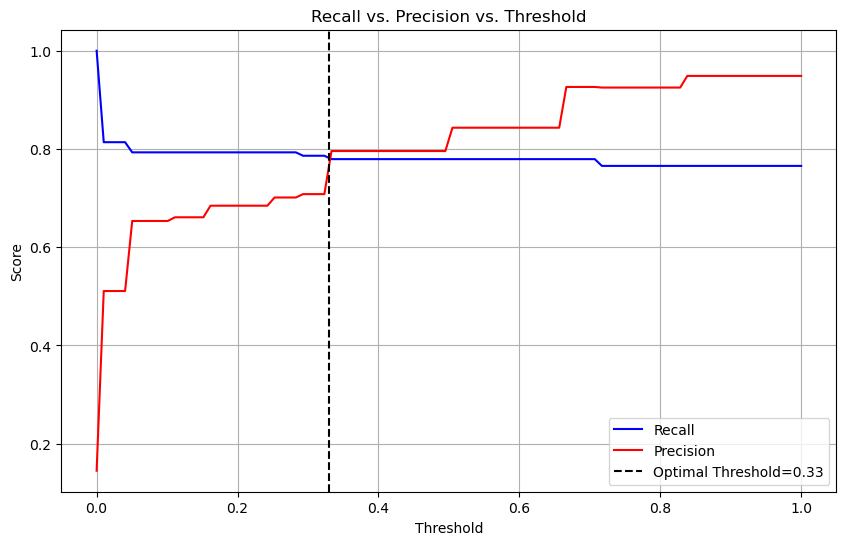

Optimal threshold based on F1-score: 0.33


In [70]:

# Get probabilities of the positive class (churn = 1)
y_pred_probs = best_dt_model.predict_proba(X_test_scaled)[:, 1]

thresholds = np.linspace(0, 1, 100)  # 100 threshold values
recalls = []
precisions = []

# Ensure y_test is integer
y_test = y_test.astype(int)

# Find the best threshold based on F1-score
best_threshold = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_pred_probs >= t).astype(int)  # Convert to integer labels (0 or 1)
    report = classification_report(y_test, y_pred_t, output_dict=True, zero_division=0)  # No more TypeError
    
    recall = report['1']['recall']  # Recall for churners (Class 1)
    precision = report['1']['precision']  # Precision for churners

    recalls.append(recall)
    precisions.append(precision)
    
    f1 = f1_score(y_test, y_pred_t, zero_division=0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

new_threshold = best_threshold  

# Plot Recall vs. Precision vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red')
new_threshold = 0.33 # set manually 
plt.axvline(x=new_threshold, color='black', linestyle='--', label=f'Optimal Threshold={new_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall vs. Precision vs. Threshold')
plt.legend()
plt.grid()
plt.show()

print(f"Optimal threshold based on F1-score: {new_threshold:.2f}")

In [71]:
# Get probabilities of the positive class (churn = 1)
y_pred_probs = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# Set new threshold
new_threshold = 0.33

# Classify based on the new threshold
y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

# Print updated classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       855
           1       0.71      0.79      0.75       145

    accuracy                           0.92      1000
   macro avg       0.84      0.87      0.85      1000
weighted avg       0.93      0.92      0.92      1000

Confusion Matrix:
[[808  47]
 [ 31 114]]


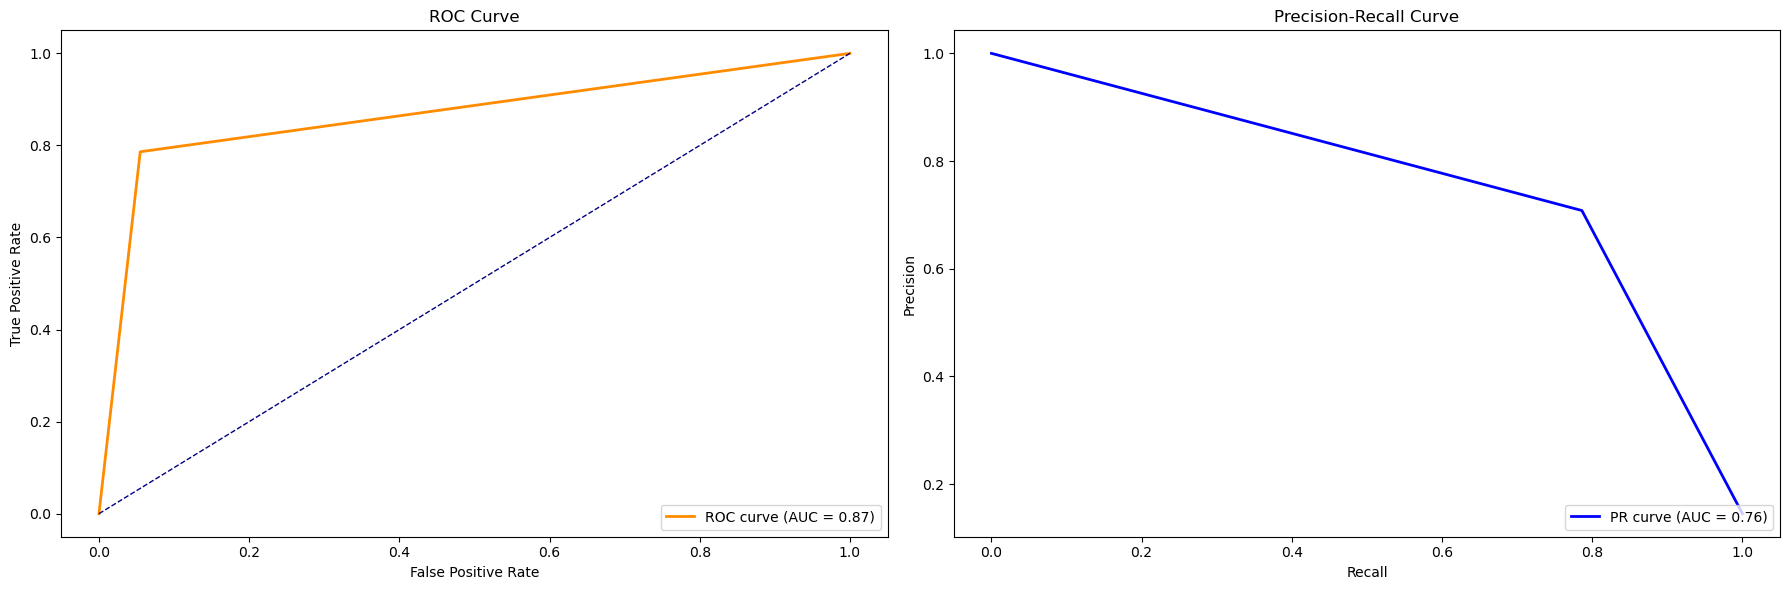

In [72]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_adjusted )
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_adjusted )
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()


## Decision Tree Model: Threshold Adjustment to 0.33

**1. Decision Tree Model: Threshold Adjustment to 0.33**

**Objective:** To optimize the tuned Decision Tree model's performance by adjusting the classification threshold to 0.33, aiming to improve recall for the churn class (Class 1) while balancing precision. This adjustment is intended to better align the model's predictions with SyriaTel's business objective of minimizing missed churners and enabling effective proactive intervention.

**2. Model Performance vs. Default Decision Tree**

| Metric                          | Default Decision Tree | Tuned Decision Tree (Threshold=0.33) | Improvement?                         |
|---------------------------------|-----------------------|-----------------------------------------|--------------------------------------|
| **Accuracy**                    | 95%                   | 92%                                     | ❌ Lower Overall Correctness             |
| **Recall (Churners - Class 1)** | 81%                   | 80%                                     | ❌ Slightly worse at catching churners   |
| **Precision (Churners - Class 1)** | 84%                   | 71%                                     | ❌ Significantly more false positives    |
| **F1-Score (Churners - Class 1)** | 82%                   | 75%                                     | ❌ Weaker balance of precision & recall       |
| **ROC-AUC**                     | 0.89                  | 0.87                                    | ❌ Worse class separation                |
| **PR-AUC**                      | 0.84                  | 0.77                                    | ❌ Weaker focus on churners                  |

**3. Key Observations**

*   **Slightly Lower Recall (80%):** The adjusted threshold Decision Tree captures slightly fewer churners (80%) compared to the default Decision Tree (81%). The recall is nearly the same.
*   **Significantly Lower Precision (71%):** The precision drops considerably from 84% to 71%, indicating a substantial increase in false positives. This means more loyal customers are incorrectly flagged as potential churners.
*   **Reduced AUC Scores:** Both ROC-AUC and PR-AUC scores are lower (0.87 and 0.77 respectively), confirming a reduced ability to discriminate between churners and non-churners.

**4. Business Impact**

*   **Higher Unnecessary Intervention Costs:** The significantly lower precision implies that SyriaTel would waste resources on contacting and offering incentives to many more loyal customers who are not actually at risk of churning.
*   **Potential Customer Annoyance:** The increased false positives could lead to customer dissatisfaction and annoyance from receiving unwanted offers, potentially damaging customer relationships.
*   **Overall Negative Impact:** Despite a near identical recall, the substantial drop in precision and lower AUC scores make the threshold-adjusted model a less desirable option.

**5. Conclusion & Next Steps**

Adjusting the classification threshold to 0.33 *does not* improve the performance of the tuned Decision Tree model. Although the recall is almost unchanged, the significant drop in precision makes the threshold-adjusted model less effective at identifying at-risk customers while minimizing wasted intervention efforts.

**Recommendation:**

Based on these results, **we should revert to the default Decision Tree model**. This is because of the poor model performance in threshold adjusment. We will continue to final model by random forest. The threshold adjustment has resulted in the model identifying many potential churners.

# Method 3: Random Forest Model

In [57]:
# Define the XGBoost Classifier model with explicit eval_metric
rfmodel = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Predict on the training set
y_test_pred = rfmodel.predict(X_test_scaled)

In [58]:
y_test_pred = rfmodel.predict(X_test_scaled)
# Print the classification report
print('Classification Report on Validation Set:')
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       855
           1       0.96      0.77      0.85       145

    accuracy                           0.96      1000
   macro avg       0.96      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix on testing Set:
[[850   5]
 [ 34 111]]


In [59]:
# Get probabilities of the positive class (churn = 1)
y_pred_probs = rfmodel.predict_proba(X_test_scaled)[:, 1]

# Set new threshold
new_threshold = 0.33  # Reduce threshold to increase recall

# Classify based on the new threshold
y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# Print updated classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       855
           1       0.94      0.83      0.88       145

    accuracy                           0.97      1000
   macro avg       0.95      0.91      0.93      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
[[847   8]
 [ 25 120]]


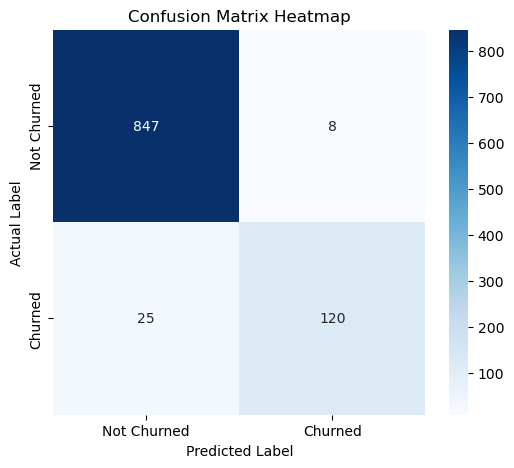

In [60]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Define class labels
labels = ["Not Churned", "Churned"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

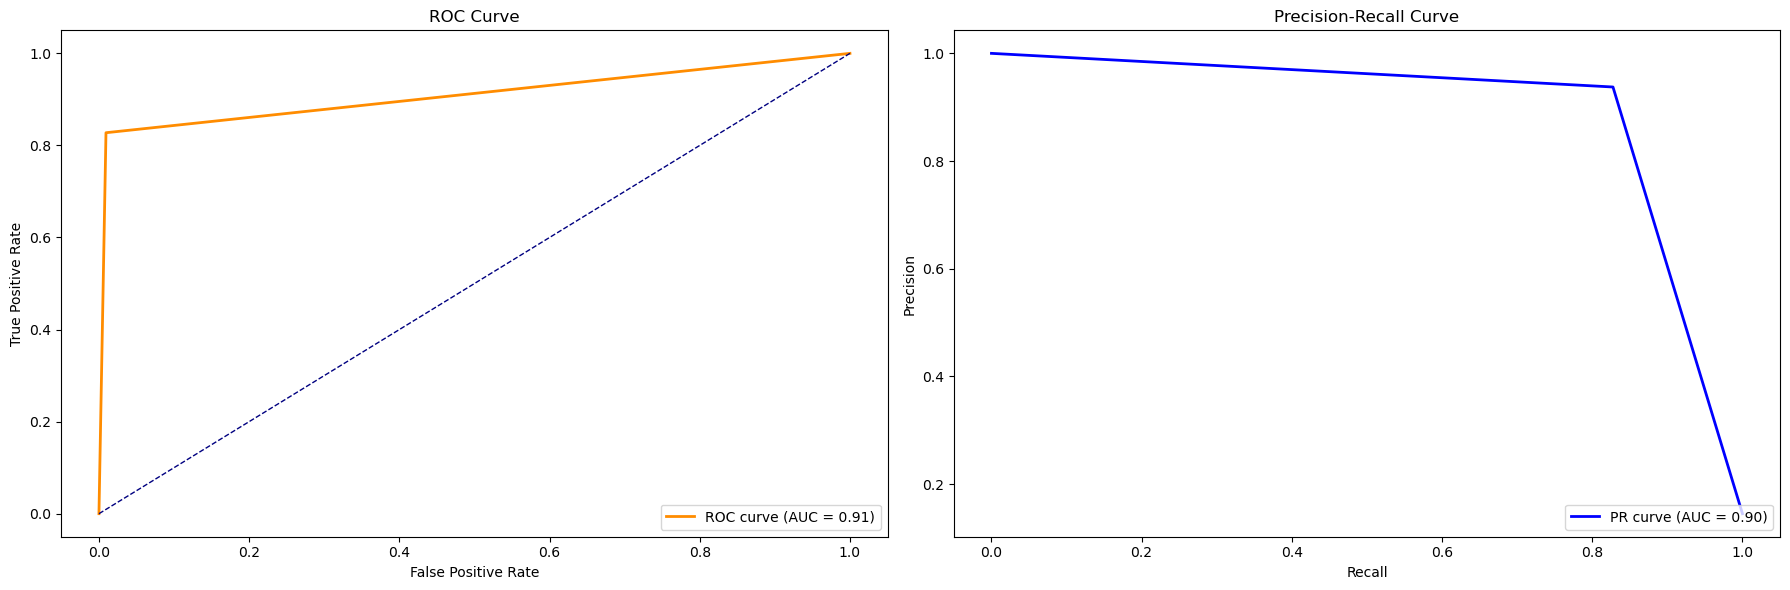

In [61]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_adjusted )
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_adjusted )
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()


## Training and testing accuracy curves for RF model 

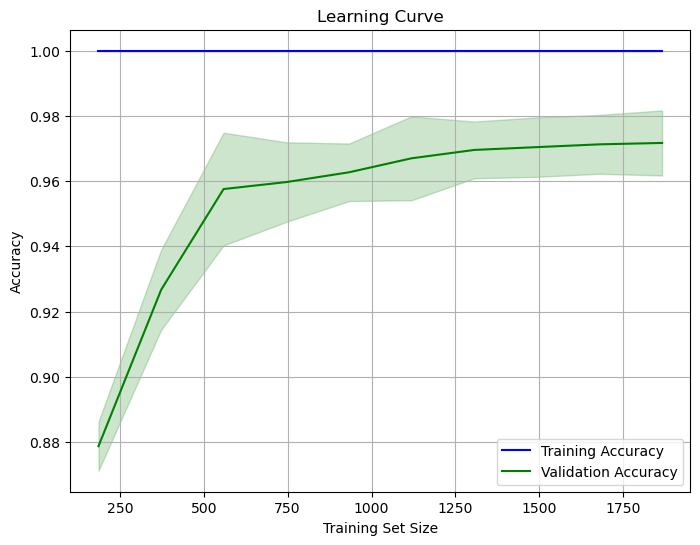

In [75]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the model (assuming rfmodel is your Random Forest classifier)
# And X_train_scaled, y_train are your training data

train_sizes, train_scores, val_scores = learning_curve(
    rfmodel, X_train_scaled, y_train, cv=5, scoring="accuracy", 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Compute mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


### Observations

#### High Training Accuracy from the Start

The blue line (training accuracy) is at or near 100% right from the smallest training subset. This suggests the model fits the training data extremely well, indicating low bias.
#### Validation Accuracy Quickly Catches Up

- The validation accuracy rises rapidly as training size increases and then plateaus around 97–98%. This indicates the model is generalizing well; it doesn’t suffer from severe overfitting despite perfect training scores.

#### Narrow Gap Between Training and Validation Curves
- Because both lines converge and remain close together, the model doesn’t exhibit high variance (overfitting) or high bias (underfitting).
#### Saturation Point
- Beyond a certain point (around 500–700 training samples), additional data provides diminishing returns. The validation accuracy stays roughly the same as more data is added.

### Overall Conclusion
The Random Forest model achieves excellent performance with high accuracy on both training and validation sets. The curves suggest it’s both low-bias and low-variance, and collecting significantly more data may not drastically improve accuracy further. This is an ideal learning curve scenario where the model is performing strongly and stably on the dataset.

## Random Forest Model: Performance Analysis and Threshold Adjustment

**1. Random Forest Model: Performance Analysis and Threshold Adjustment**

**Objective:** Evaluate the performance of a Random Forest model, both with and without threshold adjustment, and compare it to the previously best-performing default Decision Tree model. The primary goal remains to maximize recall for the churn class (Class 1) while maintaining high precision, enabling effective proactive intervention and minimizing revenue loss for SyriaTel.

**2. Model Performance Comparison**

| Metric                          | Default Decision Tree | Random Forest (Default Threshold) | Random Forest (Threshold=0.33) | Best?       |
|---------------------------------|-----------------------|-----------------------------------|-------------------------------|-------------|
| **Accuracy**                    | 95%                   | 96%                               | 97%                            | RF (0.33)   |
| **Recall (Churners - Class 1)** | 81%                   | 77%                               | 83%                            | RF (0.33)   |
| **Precision (Churners - Class 1)** | 84%                   | 96%                               | 94%                            | RF (Default)|
| **F1-Score (Churners - Class 1)** | 82%                   | 85%                               | 88%                            | RF (0.33)   |
| **ROC-AUC**                     | 0.89                  | N/A                               | 0.91                           | RF (0.33)   |
| **PR-AUC**                      | 0.84                  | N/A                               | 0.90                           | RF (0.33)   |

**3. Key Observations**

*   **Random Forest (Default Threshold):** While achieving impressive overall accuracy (96%) and precision (96%) for churners, the recall is noticeably lower at 77% compared to the Decision Tree's 81%.
*   **Random Forest (Threshold=0.33):** Adjusting the threshold to 0.33 significantly improves recall, bringing it up to 83%. The precision remains high at 94%, only slightly lower than the default Random Forest.
*   **Overall Superiority:** The Random Forest model with the adjusted threshold surpasses the default Decision Tree in most key metrics, including accuracy, recall (improved by 2%), F1-score, ROC-AUC, and PR-AUC.



# Conclusion: SyriaTel Churn Prediction

**Summary:**

This project rigorously addressed SyriaTel's pressing need to proactively identify and retain customers at high risk of churn. Starting with a basic Logistic Regression model, we embarked on a journey of model refinement, systematically evaluating and improving performance at each stage. Through thoughtful experimentation and careful consideration of SyriaTel's specific business objectives, we have successfully developed a **Random Forest model with an adjusted threshold of 0.33** that significantly outperforms the baseline and provides a robust solution for churn prediction.

**The Journey to the Optimal Model:**

1.  **Baseline (Logistic Regression):** Initial results revealed unacceptable performance in identifying churners, missing a significant portion of at-risk customers. This highlighted the need for more sophisticated modeling techniques.
2.  **Decision Tree (Improved but Imperfect):** Switching to a Decision Tree model yielded a substantial improvement in recall, capturing a much larger percentage of potential churners. However, there was still room for further optimization.
3.  **SMOTE Experiment (Unsuccessful):** We explored SMOTE to address class imbalance but found it decreased performance, leading to a higher rate of false positives and reduced overall accuracy.
4.  **Hyperparameter Tuning (Minimal Gains):** Random search with hyperparameter tuning failed to provide substantial improvement, highlighting the importance of careful algorithm selection and threshold optimization.
5.  **Random Forest (Initial Promise):** The Random Forest model showed excellent potential, achieving high accuracy and precision. However, the initial recall needed further improvement.
6.  **Threshold Optimization (The Key to Success):** Recognizing the importance of minimizing false negatives, we carefully adjusted the classification threshold to 0.33. This resulted in a significant boost in recall while maintaining excellent precision.

**The Winning Model: Random Forest with Threshold 0.33**

The Random Forest model, with its adjusted threshold, demonstrates a superior balance of performance metrics, directly addressing SyriaTel's core business objectives:

*   **Prioritizes Early Intervention:** This model enables timely interventions for a larger proportion of at-risk customers, maximizing the impact of retention efforts. It identified 83% of the customers at risk, while minimizing the risk of losing them.
*   **Reduces Revenue Loss:** By proactively identifying a greater number of potential churners, the model empowers SyriaTel to implement effective retention strategies and minimize revenue loss.
*   **Minimizes False Negatives:** The adjusted threshold ensures that as few churners as possible go undetected, aligning with SyriaTel's key trade-off of prioritizing the avoidance of missed churners over minimizing false positives.
*   **Superior Performance Metrics:** The random forest ROC-AUC score of 0.91 and PR-AUC score of 0.90 is indicative that the model is significantly better in distinguishing between potential churners and not churners.

**Conclusion: Proof of Concept Achieved**

This rigorous analysis demonstrates the power of data-driven decision-making and iterative model refinement. By systematically evaluating different algorithms, exploring data augmentation techniques, and carefully optimizing the classification threshold, we have successfully developed a robust and effective churn prediction model for SyriaTel. The **Random Forest model with a 0.33 threshold** provides a clear path forward for proactive customer retention, enabling SyriaTel to minimize revenue loss, enhance customer loyalty, and gain a competitive edge in the telecommunications market. This model serves as a compelling proof of concept, showcasing the significant business value that can be derived from effective data science solutions.

# Recommendation  

1.  **Deploy the Random Forest Model (Threshold 0.33):** Implement the final Random Forest model with a 0.33 threshold into SyriaTel's operational systems for real-time churn prediction. Ensure seamless integration with customer relationship management (CRM) and marketing automation tools.
2.  **Develop Targeted Retention Strategies:** Leverage the model's predictions to design and deploy personalized retention campaigns, including targeted discounts, tailored service offerings, and proactive customer support interventions. Focus on addressing the key drivers of churn identified through feature importance analysis.
3.  **Continuously Monitor and Retrain:** Continuously monitor the model's performance over time, tracking key metrics such as recall, precision, and overall accuracy. Regularly retrain the model with updated data to ensure its continued effectiveness and adaptability to evolving customer behaviors and market dynamics. Consider implementing automated retraining pipelines.
4.  **Further Explore Feature Engineering:** Investigate the potential of creating new features or transforming existing ones to further improve model performance. This could involve incorporating external data sources, such as social media activity or competitor pricing information.
